# Time Series Forecasting

In [2]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from math import sqrt

import warnings
warnings.filterwarnings("ignore")

## 1. FOR Spare Codes

### 1.1 READ THE DATASET AND BASIC CHECK OF DATASET - EDA

In [4]:
df1 = pd.read_excel("SpareCode.xlsx")
df1.head(12)

FileNotFoundError: [Errno 2] No such file or directory: 'SpareCode.xlsx'

In [ ]:
df1.tail(12)

,Item Code,lcddisplay165846
229,2024-11-15,0
230,2024-11-16,0
231,2024-11-17,0
232,2024-11-18,0
233,2024-11-19,2
234,2024-11-20,0
235,2024-11-21,0
236,2024-11-22,0
237,2024-11-23,0
238,2024-11-24,0


In [ ]:
df1.shape

(241, 2)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Item Code         241 non-null    datetime64[ns]
 1   lcddisplay165846  241 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.9 KB


In [ ]:
# Change column name of item code
df1.rename(columns = {'Item Code' : 'dateofconsumtion'}, inplace = True)

In [ ]:
df1.describe().T

,count,mean,min,25%,50%,75%,max,std
dateofconsumtion,241,2024-06-08 18:07:28.132780032,2023-11-23 00:00:00,2024-03-09 00:00:00,2024-06-06 00:00:00,2024-09-16 00:00:00,2024-11-26 00:00:00,NaN
lcddisplay165846,241.0,0.178423,0.0,0.0,0.0,0.0,6.0,0.589236


In [ ]:
# Null Value Check
df1.isnull().sum()

,0
dateofconsumtion,0
lcddisplay165846,0


In [ ]:
df1[df1['lcddisplay165846'].isnull()]

,dateofconsumtion,lcddisplay165846


In [ ]:
# to see null value index locations
# df1[170:180]

,dateofconsumtion,lcddisplay165846
170,2024-08-30,0
171,2024-08-31,0
172,2024-09-02,0
173,2024-09-03,0
174,2024-09-06,1
175,2024-09-09,0
176,2024-09-10,0
177,2024-09-11,0
178,2024-09-12,0
179,2024-09-13,0


#### Now Convert this dataframe into a time series data

In [ ]:
df1["dateofconsumtion"] = pd.to_datetime(df1["dateofconsumtion"])

In [ ]:
df1.set_index("dateofconsumtion", inplace = True)

In [ ]:
df1.head()

,lcddisplay165846
dateofconsumtion,
2023-11-23,0
2023-11-27,0
2023-11-30,0
2023-12-01,0
2023-12-11,0


In [ ]:
df1.tail()

,lcddisplay165846
dateofconsumtion,
2024-11-22,0
2024-11-23,0
2024-11-24,0
2024-11-25,0
2024-11-26,0


In [ ]:
df1.shape

(241, 1)

#### Plotting the data

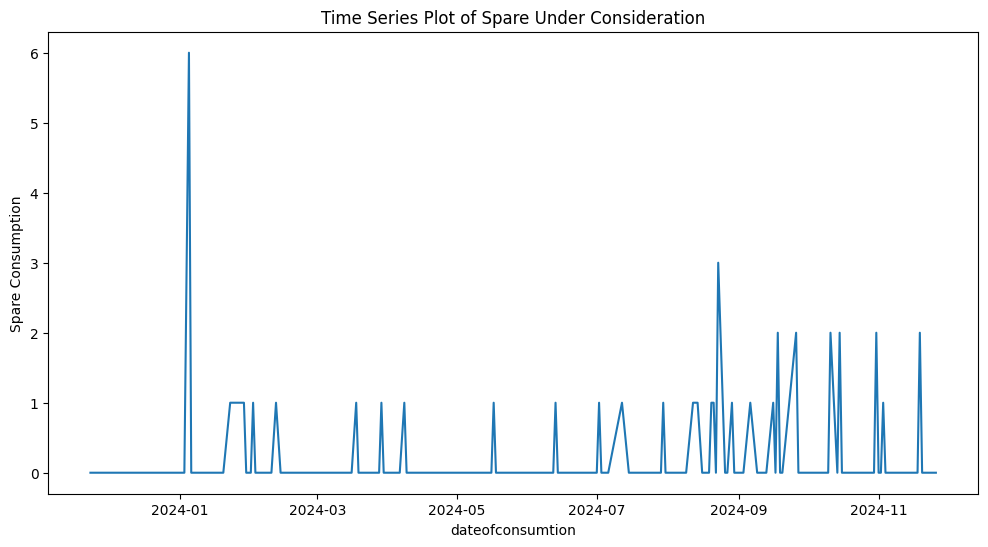

In [ ]:
plt.figure(figsize = (12, 6))

plt.plot(df1)
plt.xlabel("dateofconsumtion")
plt.ylabel("Spare Consumption")
plt.title("Time Series Plot of Spare Under Consideration")
plt.show()

#### TO TREAT MISSING VALUES

In [ ]:
# For Treating missing values we shall take the average of all the seasonal values
# df1[174:176]

,Rose
YearMonth,
1994-07-01,NaN
1994-08-01,NaN


In [ ]:
# See only july month values
julyvalues = df1[df1.index.month == 7]
julyvalues.describe().T

,count,mean,std,min,25%,50%,75%,max
lcddisplay165846,16.0,0.1875,0.403113,0.0,0.0,0.0,0.0,1.0


In [ ]:
# See only August month values
augustvalues = df1[df1.index.month == 8]
augustvalues.mean()

,0
lcddisplay165846,0.363636


In [ ]:
# Now Impute the missing value at index 174 with the mean of julyvalues
# df1.loc["1994-07-01"] = julyvalues.mean()

In [ ]:
# Now Impute the missing value at index 175 with the mean of August values
# df1.loc["1994-08-01"] = augustvalues.mean()

<Axes: xlabel='dateofconsumtion'>

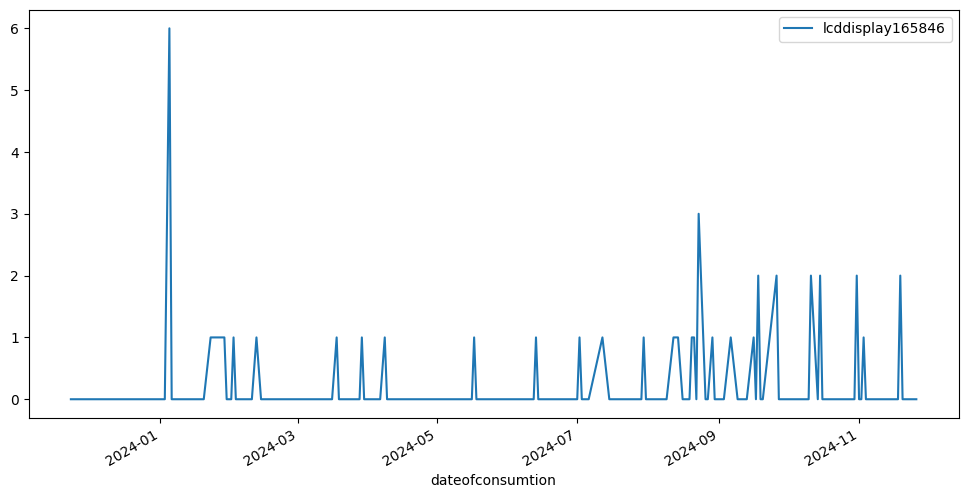

In [ ]:
df1.plot(figsize = (12, 6))

#### So now the missing values are imputed

In [ ]:
# Description of data after imputing the missing values
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
lcddisplay165846,241.0,0.178423,0.589236,0.0,0.0,0.0,0.0,6.0


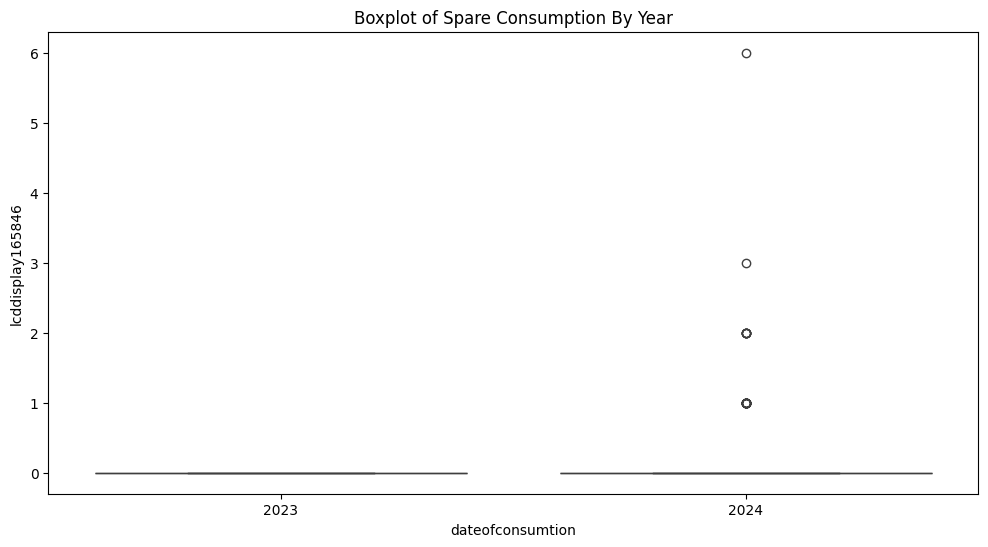

In [ ]:
# Boxplot across all years

plt.figure(figsize = (12, 6))
sns.boxplot(df1,x=df1.index.year, y = "lcddisplay165846")
plt.title("Boxplot of Spare Consumption By Year")
plt.show()

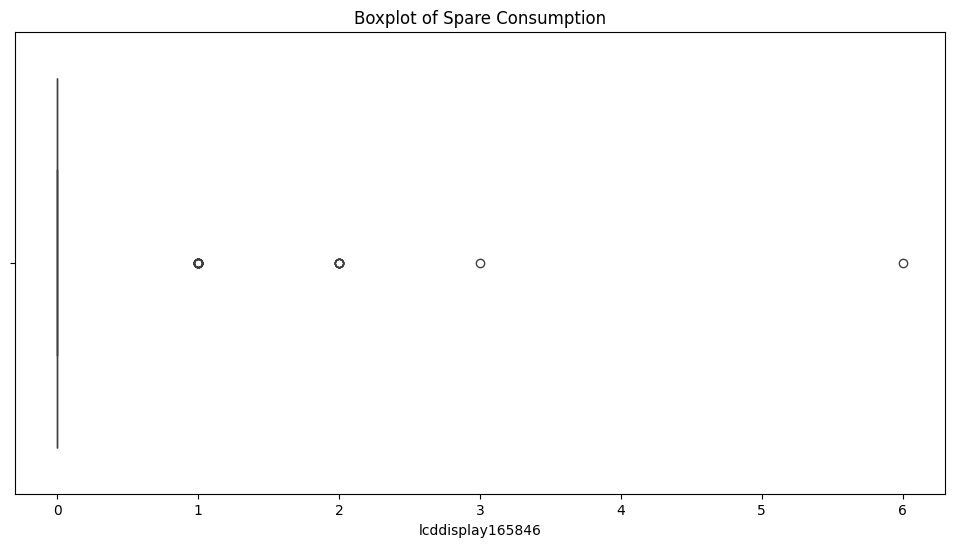

In [ ]:
# Boxplot of df1

plt.figure(figsize = (12, 6))
sns.boxplot(df1, x = "lcddisplay165846")
plt.title("Boxplot of Spare Consumption")
plt.show()

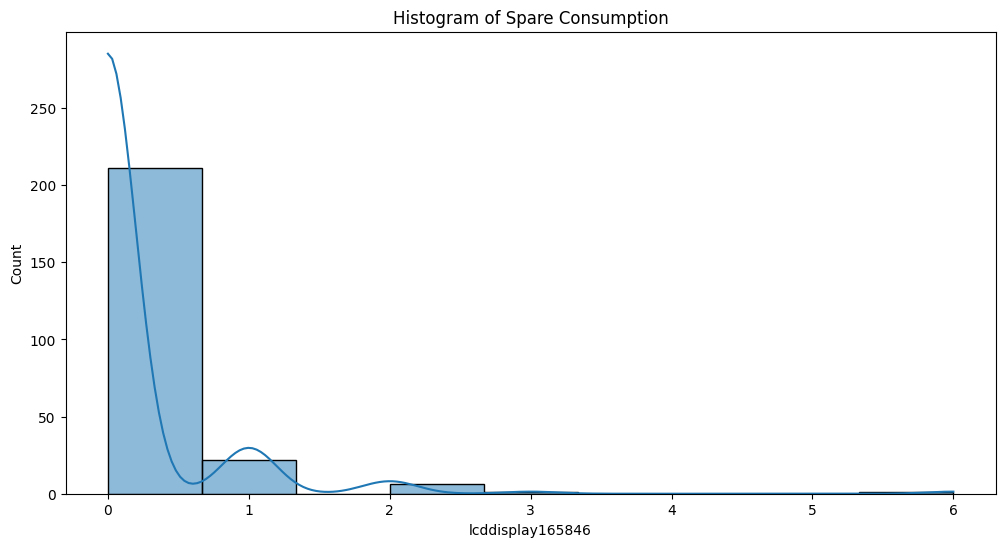

In [ ]:
# histogram of df1

plt.figure(figsize = (12, 6))
sns.histplot(df1, x = "lcddisplay165846", kde = True)
plt.title("Histogram of Spare Consumption")
plt.show()

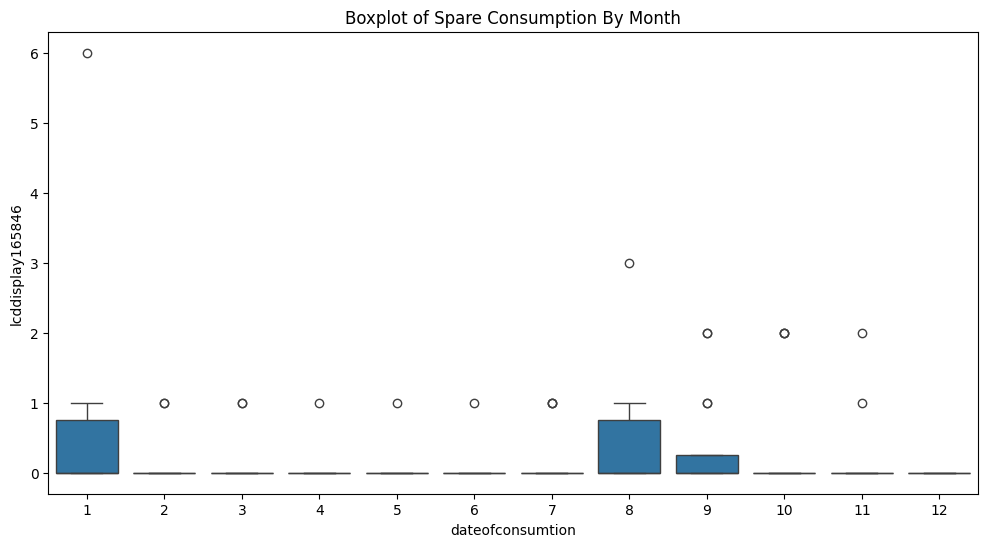

In [ ]:
# Boxplot across all months

plt.figure(figsize = (12, 6))
sns.boxplot(df1,x=df1.index.month, y = "lcddisplay165846")
plt.title("Boxplot of Spare Consumption By Month")
plt.show()

#### Now we will decompose the data into trend, seasonality and residual.

In [ ]:
df1['lcddisplay165846'] = df1['lcddisplay165846'].fillna(0)


<Figure size 1200x600 with 0 Axes>

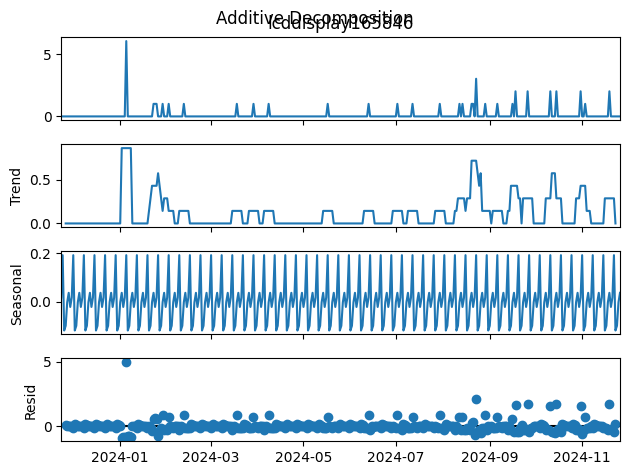

In [ ]:
# Set the frequency explicitly (assuming daily frequency)
df1 = df1.asfreq('D')

# Perform seasonal decomposition with an appropriate period (e.g., 7 for weekly seasonality)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposeadd = seasonal_decompose(df1['lcddisplay165846'], model="additive", period=7)

# Plot the decomposition
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
decomposeadd.plot()
plt.suptitle("Additive Decomposition")
plt.show()


<Figure size 1200x600 with 0 Axes>

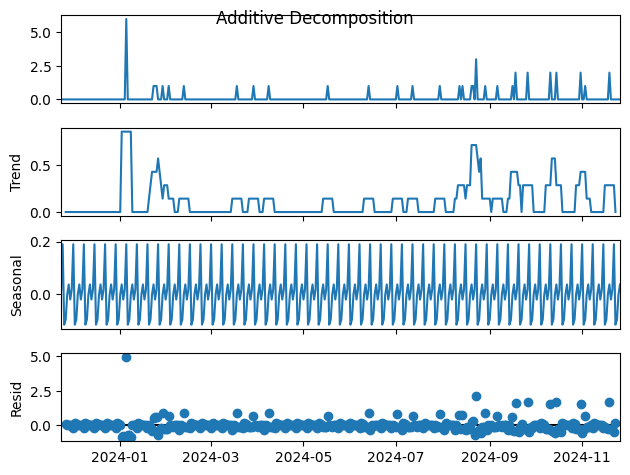

In [ ]:
# Additive seasonal decomposition
decomposeadd = seasonal_decompose(df1, model = "additive")

plt.figure(figsize = (12, 6))
decomposeadd.plot()
plt.suptitle("Additive Decomposition")
plt.show();

In [ ]:
# Multiplicative seasonal decomposition
decomposemul = seasonal_decompose(df1, model = "multiplicative")

plt.figure(figsize = (12, 6))
decomposemul.plot()
plt.suptitle("Multiplicative Decomposition")
plt.show();

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

NameError: name 'decomposemul' is not defined

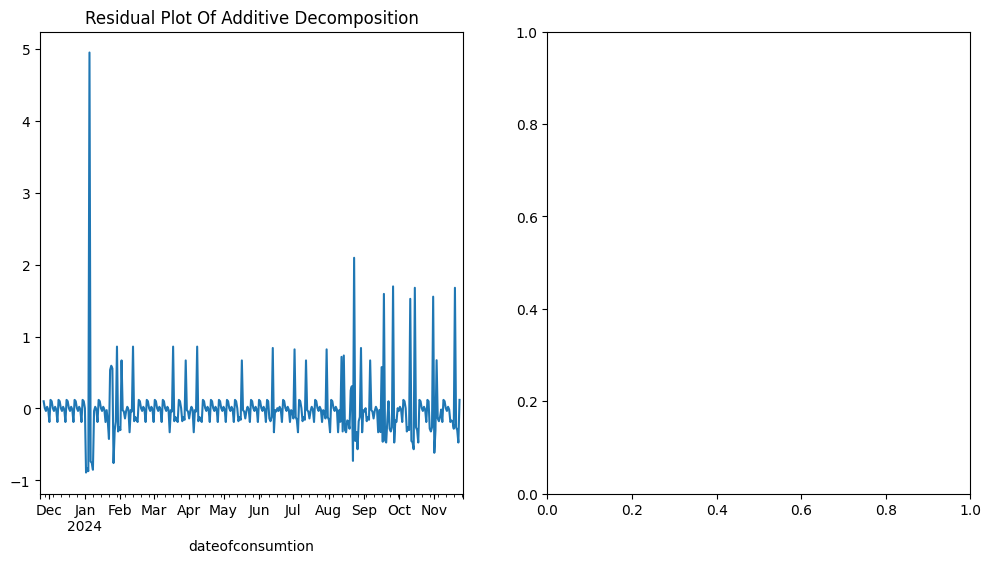

In [ ]:
# plotting both residuals together

plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
decomposeadd.resid.plot()
plt.title("Residual Plot Of Additive Decomposition")

plt.subplot(1, 2, 2)
decomposemul.resid.plot()
plt.title("Residual Plot Of Multiplicative Decomposition")
plt.show()

### 1.2 Data Pre-Processing

#### Null Value Check

In [ ]:
df1.isnull().sum()

,0
lcddisplay165846,0


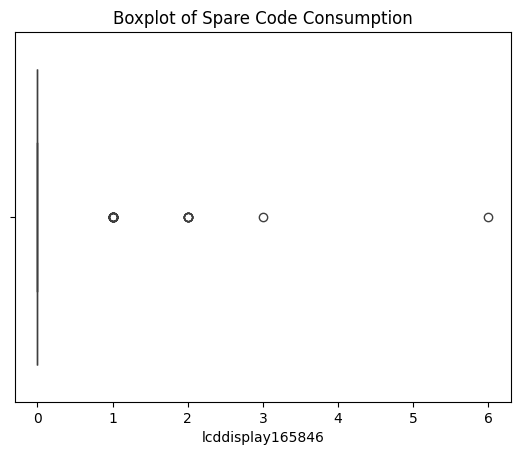

In [ ]:
# plotting a boxplot & Outlier Check if you say so
sns.boxplot(df1,x='lcddisplay165846')
plt.title('Boxplot of Spare Code Consumption')
plt.show()

#### Train and Test Split 70:30

In [ ]:
len(df1)

370

In [ ]:
370*0.8

296.0

In [ ]:
df1[131:132]

,Rose
YearMonth,
1990-12-01,132.0


In [ ]:
train = df1[0:296]
test = df1[296:]

#### Plot the train and test together to confirm

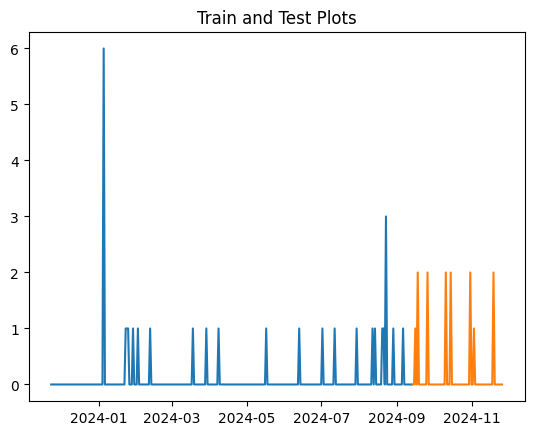

In [ ]:
plt.plot(train)
plt.plot(test)
plt.title('Train and Test Plots')
plt.show();

### 1.3 MODEL BUILDING

#### MODEL 1 - Linear Regression

In [ ]:
# First We will build the linear regression model
print('Train Shape - ',train.shape)
print('Test Shape - ',test.shape)
print('df1 Shape - ',df1.shape)

Train Shape -  (296, 1)
Test Shape -  (74, 1)
df1 Shape -  (370, 1)


In [ ]:
# creating the Predictor Variable First or the Independent Variable for Linear Regression Model to Work
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time Instance \n', train_time)
print('Test Time Instance \n', test_time)

Training Time Instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 21

In [ ]:
# Taking backup of dataframe
lr_train = train.copy()
lr_test = test.copy()

In [ ]:
# Adding new column named "Time" to our dataframe
lr_train['Time'] = train_time
lr_test['Time'] = test_time

In [ ]:
# Instantiating the Linear Regression Model
lrmodel = LinearRegression()
lr = lrmodel.fit(lr_train[['Time']] , lr_train['lcddisplay165846'])

In [ ]:
# Now Prediction
test_predict = lr.predict(lr_test[['Time']])

In [ ]:
lr_test['Test_Predictions'] = test_predict

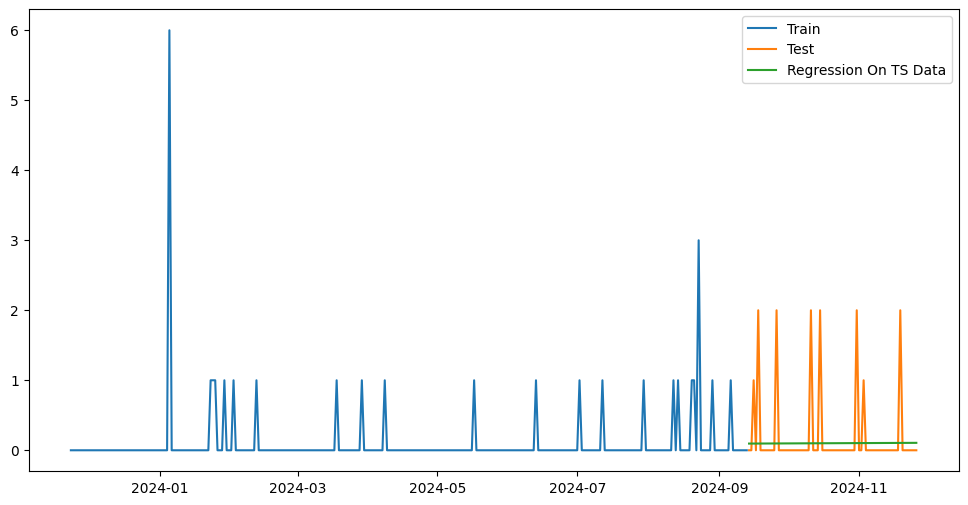

In [ ]:
# Now plotting all the three Train, Test and Predictions
plt.figure(figsize=(12,6))
plt.plot(lr_train['lcddisplay165846'] , label = 'Train')
plt.plot(lr_test['lcddisplay165846'] , label = 'Test')
plt.plot(lr_test['Test_Predictions'] , label = 'Regression On TS Data')
plt.legend(loc = 'best')
plt.show();

#### Now Evaluating the predictions using RMSE

In [ ]:
rmse1 = metrics.mean_squared_error(lr_test['lcddisplay165846'],lr_test['Test_Predictions'])
rmse1 = sqrt(rmse1)
print('RMSE With LINEAR REGRESSION IS: {}'.format(rmse1))

RMSE With LINEAR REGRESSION IS: 0.5689270159228195


In [ ]:
# Taking the RMSE value into a dataframe which we will use it even later to build it up with the results from the subsequent models
resultdf1 = pd.DataFrame({'RMSE' : [rmse1]} , index = ['Linear Regression On Time'] )
resultdf1

,RMSE
Linear Regression On Time,0.568927


#### Model 2 - Simple Average Model

In [ ]:
# Average of the Rose Sales
avg = df1['lcddisplay165846'].mean()
avg

0.11621621621621622

In [ ]:
# Set this avg value as the average forecast
lr_test['Avg_Forecast'] = avg
lr_test

,lcddisplay165846,Time,Test_Predictions,Avg_Forecast
dateofconsumtion,,,,
2024-09-14,0.0,133,0.095753,0.116216
2024-09-15,0.0,134,0.095896,0.116216
2024-09-16,1.0,135,0.096040,0.116216
2024-09-17,0.0,136,0.096183,0.116216
2024-09-18,2.0,137,0.096326,0.116216
...,...,...,...,...
2024-11-22,0.0,202,0.105635,0.116216
2024-11-23,0.0,203,0.105778,0.116216
2024-11-24,0.0,204,0.105921,0.116216


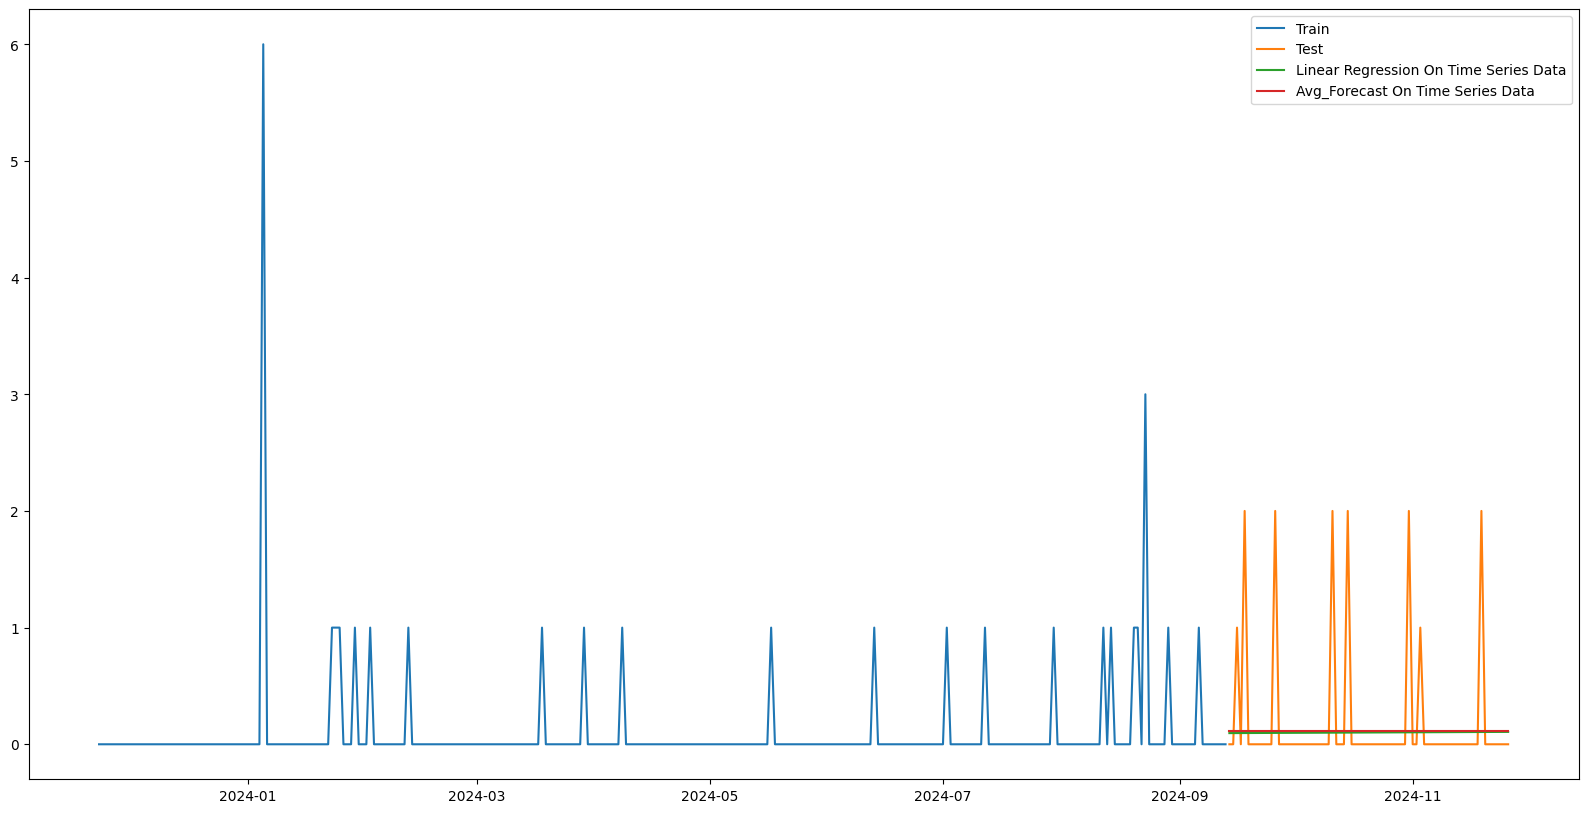

In [ ]:
# Plotting all three Train, Test and Forecasts so far
plt.figure(figsize = (20, 10))
plt.plot(train, label = 'Train')
plt.plot(lr_test['lcddisplay165846'], label = 'Test')
plt.plot(lr_test['Test_Predictions'], label = 'Linear Regression On Time Series Data')
plt.plot(lr_test['Avg_Forecast'], label = 'Avg_Forecast On Time Series Data')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# Calculating RMSE
rmse2 = mean_squared_error(lr_test['lcddisplay165846'], lr_test['Avg_Forecast'])
rmse2=sqrt(rmse2)
print('RMSE With SIMPLE AVERAGE FORECAST IS: {}'.format(rmse2))

RMSE With SIMPLE AVERAGE FORECAST IS: 0.566466112693251


In [ ]:
# Capturing this RMSE into the resultdf dataframe
resultdf2 = pd.DataFrame({'RMSE' : rmse2}, index = ['Average Forecast'])
pd.concat([resultdf1, resultdf2])

,RMSE
Linear Regression On Time,0.568927
Average Forecast,0.566466


#### Model 3: Moving Average Forecast

In [ ]:
# We will first take moving average over the entire data
ma_avg = df1.copy()

# Calculating moving average
for i in range(6, 1, -1):
    ma_avg['MA_Forecast_{}'.format(i)] = ma_avg['lcddisplay165846'].rolling(i).mean()

ma_avg

,lcddisplay165846,MA_Forecast_6,MA_Forecast_5,MA_Forecast_4,MA_Forecast_3,MA_Forecast_2
dateofconsumtion,,,,,,
2023-11-23,0.0,NaN,NaN,NaN,NaN,NaN
2023-11-24,0.0,NaN,NaN,NaN,NaN,0.0
2023-11-25,0.0,NaN,NaN,NaN,0.0,0.0
2023-11-26,0.0,NaN,NaN,0.0,0.0,0.0
2023-11-27,0.0,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2024-11-22,0.0,0.333333,0.4,0.5,0.0,0.0
2024-11-23,0.0,0.333333,0.4,0.0,0.0,0.0
2024-11-24,0.0,0.333333,0.0,0.0,0.0,0.0


In [ ]:
# Now we will split this mv_avg dataframe into train and test
ma_train = ma_avg[0:296]
ma_test = ma_avg[296:]

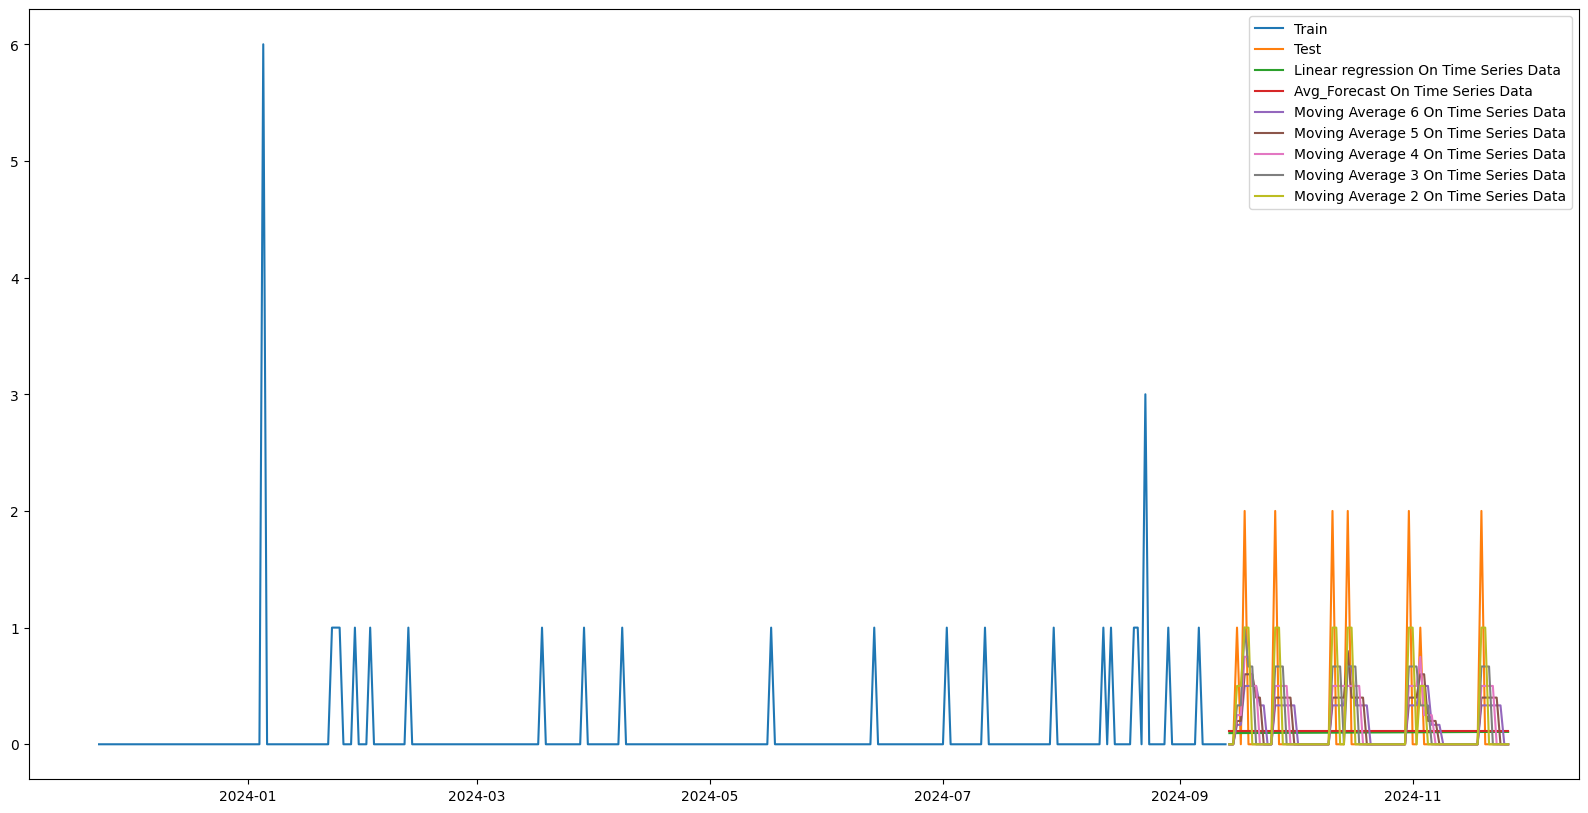

In [ ]:
# Plotting Train, Test, Linear Regression, Simple Average and Moving Average Forecasts together
plt.figure(figsize = (20, 10))
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(lr_test['Test_Predictions'], label = 'Linear regression On Time Series Data')
plt.plot(lr_test['Avg_Forecast'], label = 'Avg_Forecast On Time Series Data')
plt.plot(ma_test['MA_Forecast_6'], label = 'Moving Average 6 On Time Series Data')
plt.plot(ma_test['MA_Forecast_5'], label = 'Moving Average 5 On Time Series Data')
plt.plot(ma_test['MA_Forecast_4'], label = 'Moving Average 4 On Time Series Data')
plt.plot(ma_test['MA_Forecast_3'], label = 'Moving Average 3 On Time Series Data')
plt.plot(ma_test['MA_Forecast_2'], label = 'Moving Average 2 On Time Series Data')
plt.legend(loc = 'best')
plt.show()


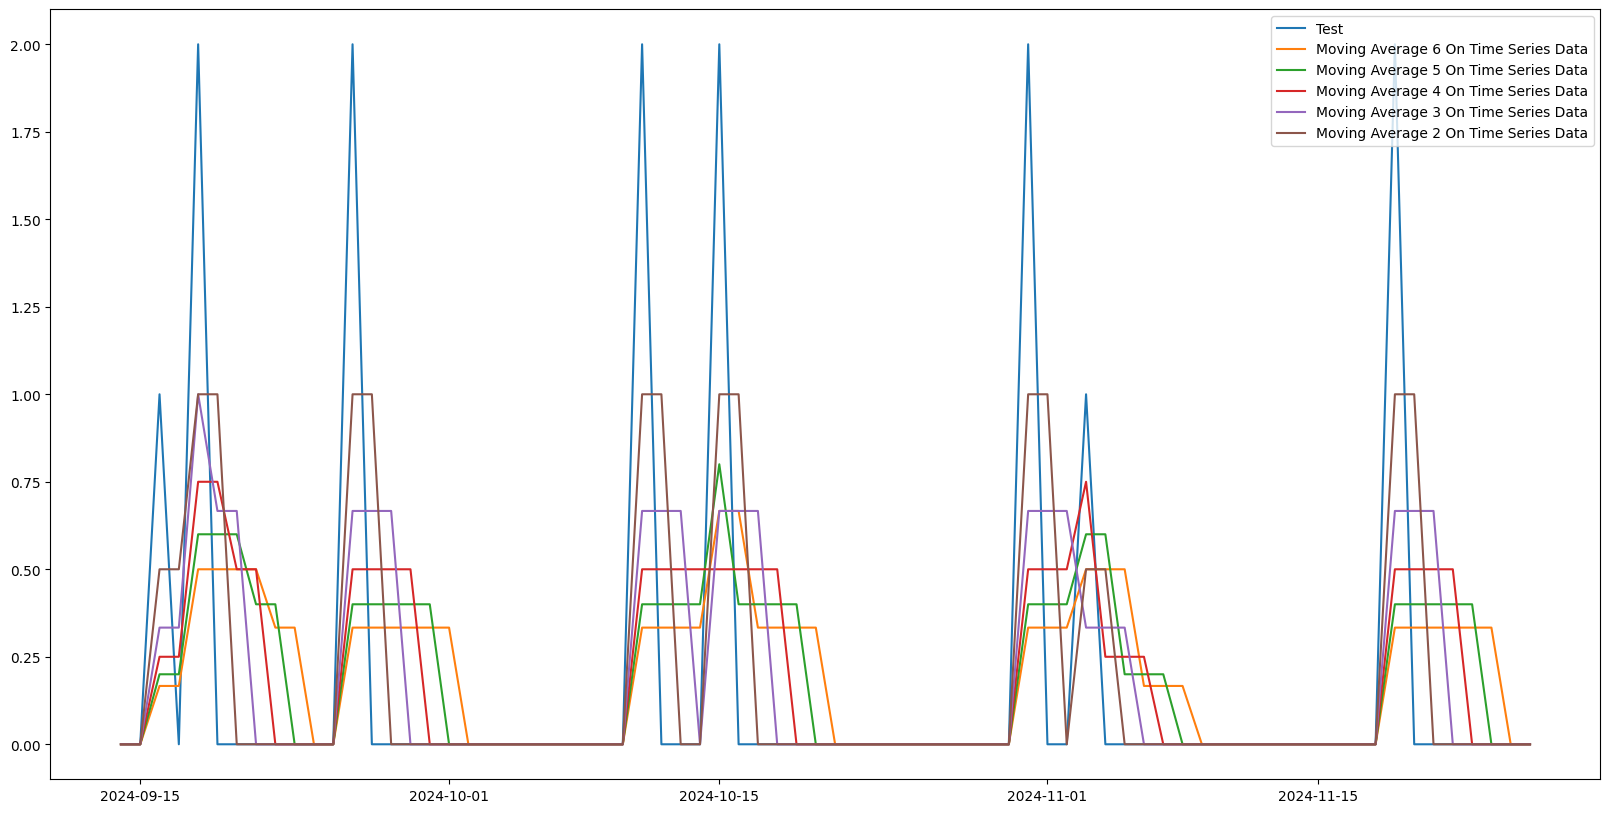

In [ ]:
# Zoomed Version of above plot
plt.figure(figsize = (20, 10))
plt.plot(test, label = 'Test')
plt.plot(ma_test['MA_Forecast_6'], label = 'Moving Average 6 On Time Series Data')
plt.plot(ma_test['MA_Forecast_5'], label = 'Moving Average 5 On Time Series Data')
plt.plot(ma_test['MA_Forecast_4'], label = 'Moving Average 4 On Time Series Data')
plt.plot(ma_test['MA_Forecast_3'], label = 'Moving Average 3 On Time Series Data')
plt.plot(ma_test['MA_Forecast_2'], label = 'Moving Average 2 On Time Series Data')
plt.legend(loc = 'best')
plt.show()


In [ ]:
# Now Calculating RMSE For each of the moving average forecasts
rmsema3 = mean_squared_error(ma_test['lcddisplay165846'], ma_test['MA_Forecast_2'])
rmsema3=sqrt(rmsema3)
print('RMSE With MOVING AVERAGE 2 IS: {}'.format(rmsema3))
rmsema4 = mean_squared_error(ma_test['lcddisplay165846'], ma_test['MA_Forecast_3'])
rmsema4=sqrt(rmsema4)
print('RMSE With MOVING AVERAGE 3 IS: {}'.format(rmsema4))
rmsema5 = mean_squared_error(ma_test['lcddisplay165846'], ma_test['MA_Forecast_4'])
rmsema5=sqrt(rmsema5)
print('RMSE With MOVING AVERAGE 4 IS: {}'.format(rmsema5))
rmsema6 = mean_squared_error(ma_test['lcddisplay165846'], ma_test['MA_Forecast_5'])
rmsema6=sqrt(rmsema6)
print('RMSE With MOVING AVERAGE 5 IS: {}'.format(rmsema6))
rmsema7 = mean_squared_error(ma_test['lcddisplay165846'], ma_test['MA_Forecast_6'])
rmsema7=sqrt(rmsema7)
print('RMSE With MOVING AVERAGE 6 IS: {}'.format(rmsema7))


RMSE With MOVING AVERAGE 2 IS: 0.4191368221424547
RMSE With MOVING AVERAGE 3 IS: 0.4714045207910317
RMSE With MOVING AVERAGE 4 IS: 0.49661013040575563
RMSE With MOVING AVERAGE 5 IS: 0.5029641865709457
RMSE With MOVING AVERAGE 6 IS: 0.522755462212757


In [ ]:
# Capturing this RMSE into the resultdf dataframe
resultdf3 = pd.DataFrame({'RMSE' : [rmsema3, rmsema4, rmsema5, rmsema6, rmsema7]}, index = ['Moving Average 2', 'Moving Average 3', 'Moving Average 4', 'Moving Average 5', 'Moving Average 6'])
pd.concat([resultdf1, resultdf2, resultdf3])

,RMSE
Linear Regression On Time,0.568927
Average Forecast,0.566466
Moving Average 2,0.419137
Moving Average 3,0.471405
Moving Average 4,0.496610
Moving Average 5,0.502964
Moving Average 6,0.522755


#### Model 4: Exponential Smoothing Models

In [ ]:
# Creating a Simple Exponential Smoothing
model_ses = SimpleExpSmoothing(train,initialization_method = 'estimated').fit(optimized = True)

In [ ]:
# To Get Parameters of Simple Exponential Smoothing
model_ses.params

{'smoothing_level': 1.4901170429513394e-08,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 0.09797297835996789,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
# Forecasting on test
ses_predict = model_ses.forecast(steps = len(test))

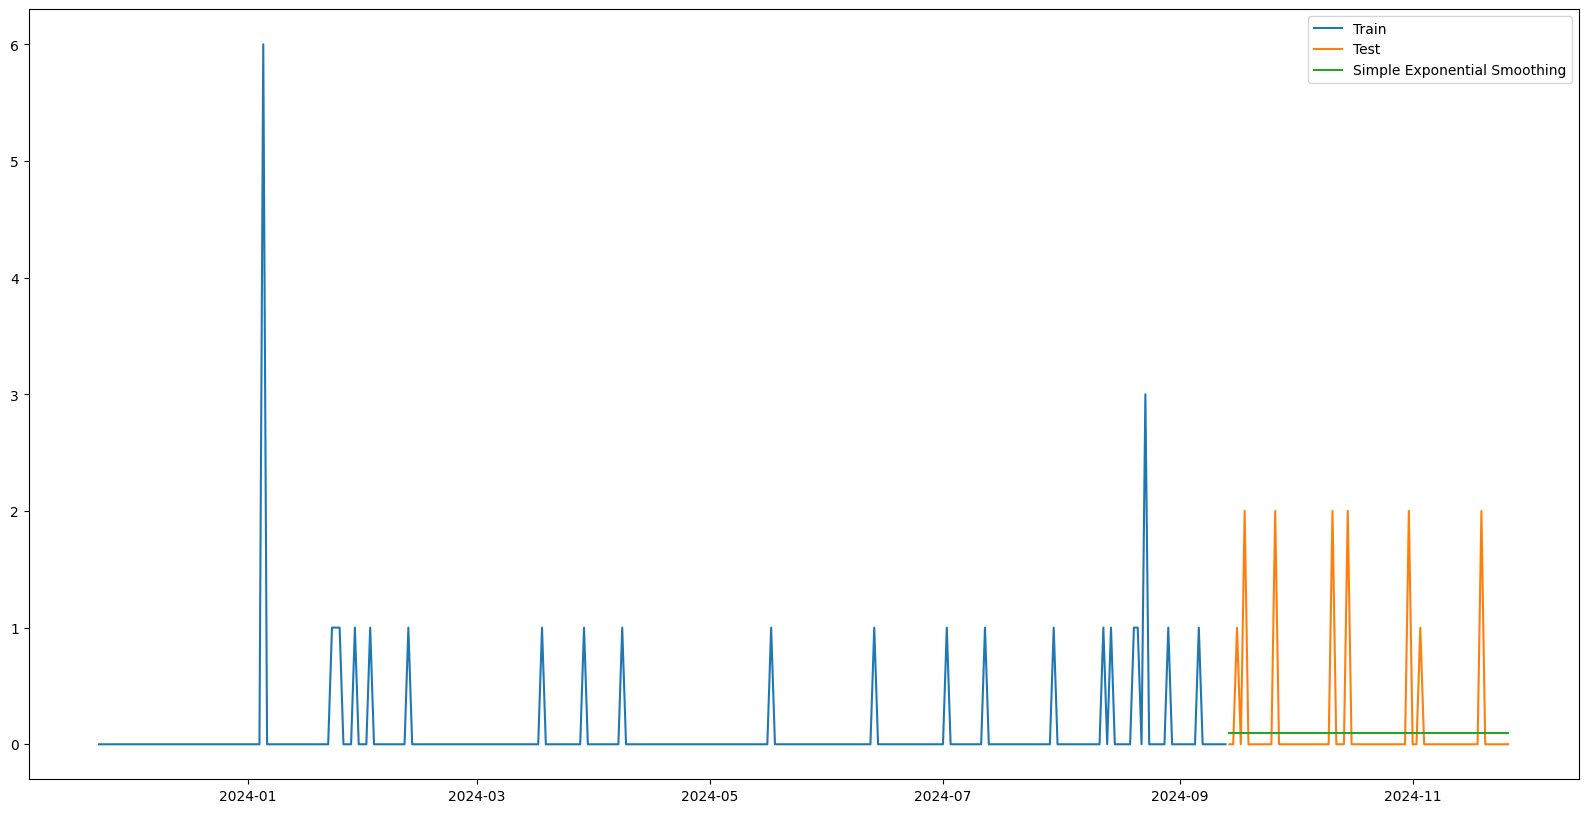

In [ ]:
# Plotting Simple Exponential Smoothing
plt.figure(figsize = (20, 10))
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(ses_predict, label = 'Simple Exponential Smoothing')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# Calculating RMSE
rmse8 = mean_squared_error(test, ses_predict)
rmse8 = sqrt(rmse8)
print('RMSE With SIMPLE EXPONENTIAL SMOOTHING IS: {}'.format(rmse8))

RMSE With SIMPLE EXPONENTIAL SMOOTHING IS: 0.5691038562189868


In [ ]:
# Capturing this RMSE into the resultdf dataframe
resultdf4 = pd.DataFrame({'RMSE' : rmse8}, index = ['Simple Exponential Smoothing'])
pd.concat([resultdf1, resultdf2, resultdf3, resultdf4])

,RMSE
Linear Regression On Time,0.568927
Average Forecast,0.566466
Moving Average 2,0.419137
Moving Average 3,0.471405
Moving Average 4,0.496610
Moving Average 5,0.502964
Moving Average 6,0.522755
Simple Exponential Smoothing,0.569104


#### Model 5: Double Exponential Smoothing

In [ ]:
# Creating a Holt's Linear Model
model_holt = Holt(train, initialization_method = 'estimated').fit(optimized = True)

In [ ]:
# To Get Parameters of Holt's Linear Model
model_holt.params

{'smoothing_level': 1.4901161193847656e-08,
 'smoothing_trend': 1.4901161193847656e-08,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 0.07671062653470088,
 'initial_trend': 0.0001431801372920869,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
# Forecasting on test
holt_predict = model_holt.forecast(steps = len(test))

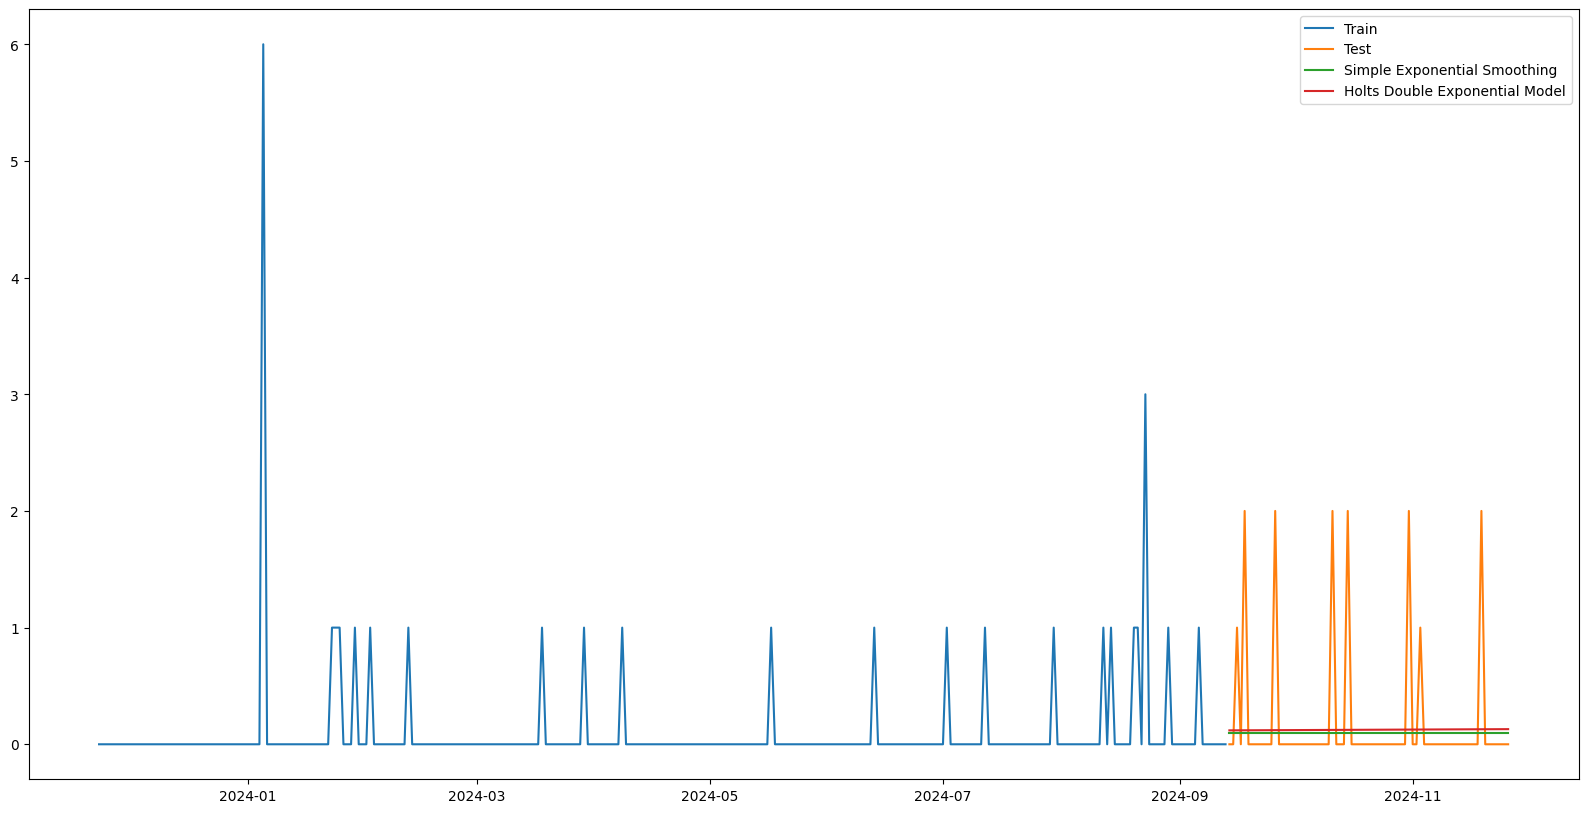

In [ ]:
# Plotting Holt's Linear Model
plt.figure(figsize = (20, 10))
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(ses_predict, label = 'Simple Exponential Smoothing')
plt.plot(holt_predict, label = 'Holts Double Exponential Model')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# calculating RMSE
rmse9 = mean_squared_error(test, holt_predict)
rmse9 = sqrt(rmse9)
print('RMSE With HOLT\'S DOUBLE EXPONENTIAL MODEL IS: {}'.format(rmse9))

RMSE With HOLT'S DOUBLE EXPONENTIAL MODEL IS: 0.5657621364569307


In [ ]:
# Capturing this RMSE into the resultdf dataframe
resultdf5 = pd.DataFrame({'RMSE' : rmse9}, index = ['Holt\'s Double Exponential Smoothing Model'])
pd.concat([resultdf1, resultdf2, resultdf3, resultdf4, resultdf5])

,RMSE
Linear Regression On Time,0.568927
Average Forecast,0.566466
Moving Average 2,0.419137
Moving Average 3,0.471405
Moving Average 4,0.496610
Moving Average 5,0.502964
Moving Average 6,0.522755
Simple Exponential Smoothing,0.569104
Holt's Double Exponential Smoothing Model,0.565762


#### Model 6: Tripple Exponential Smoothing With Additive Seasonality

In [ ]:
# Creating a Holt's Triple Exponential Model
model_tes = ExponentialSmoothing(train, trend = 'add', seasonal = 'add',initialization_method = 'estimated').fit()

In [ ]:
# To Get Parameters of Holt's Triple Exponential Model
model_tes.params

{'smoothing_level': 1.4906470612165136e-08,
 'smoothing_trend': 8.050483254137343e-09,
 'smoothing_seasonal': 6.345131119261668e-11,
 'damping_trend': nan,
 'initial_level': 0.06741323538279416,
 'initial_trend': 0.00013634286132648582,
 'initial_seasons': array([-0.01787273,  0.23787985, -0.08741325, -0.08754958,  0.03140025,
         0.00744521, -0.01651261]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
# Forecasting on test
tes_predict_add = model_tes.forecast(steps = len(test))

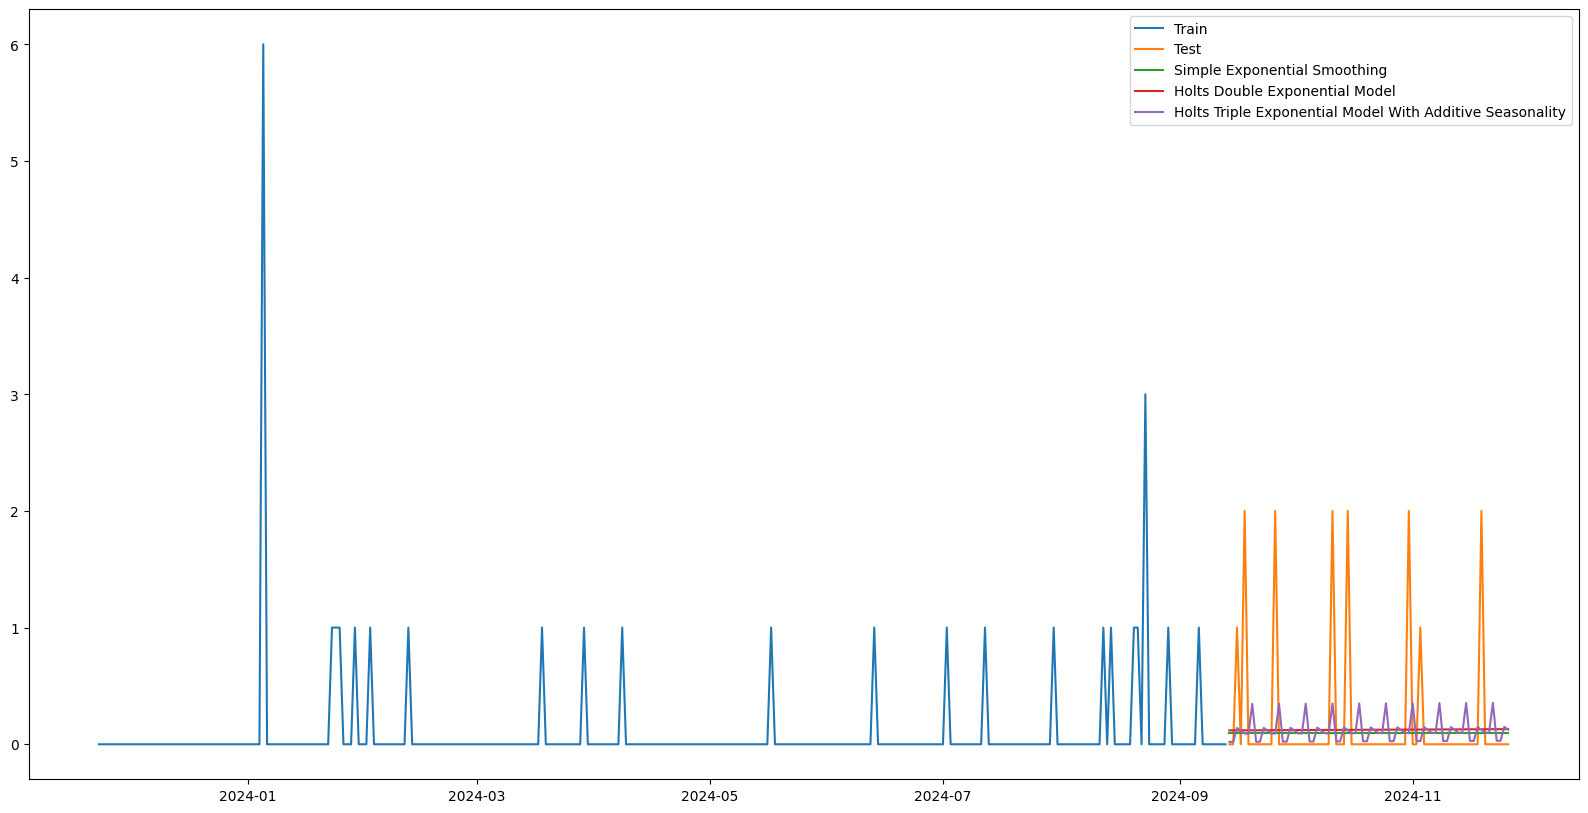

In [ ]:
# Plotting Holt's Triple Exponential Model
plt.figure(figsize = (20, 10))
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(ses_predict, label = 'Simple Exponential Smoothing')
plt.plot(holt_predict, label = 'Holts Double Exponential Model')
plt.plot(tes_predict_add, label = 'Holts Triple Exponential Model With Additive Seasonality')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# Calculating RMSE
rmse10 = mean_squared_error(test, tes_predict_add)
rmse10 = sqrt(rmse10)
print('RMSE With HOLT WINTERS TRIPLE EXPONENTIAL MODEL With ADDITIVE SEASONALITY IS: {}'.format(rmse10))

RMSE With HOLT WINTERS TRIPLE EXPONENTIAL MODEL With ADDITIVE SEASONALITY IS: 0.569382902355191


In [ ]:
# Capturing this RMSE into the resultdf dataframe
resultdf6 = pd.DataFrame({'RMSE' : rmse10}, index = ['Holts Triple Exponential Model With Additive Seasonality'])
pd.concat([resultdf1, resultdf2, resultdf3, resultdf4, resultdf5, resultdf6])

,RMSE
Linear Regression On Time,0.568927
Average Forecast,0.566466
Moving Average 2,0.419137
Moving Average 3,0.471405
Moving Average 4,0.496610
Moving Average 5,0.502964
Moving Average 6,0.522755
Simple Exponential Smoothing,0.569104
Holt's Double Exponential Smoothing Model,0.565762
Holts Triple Exponential Model With Additive Seasonality,0.569383


#### Model 7: Tripple Exponential Smoothing With Multiplicative Seasonality

In [ ]:
# Creating a Holt's Triple Exponential Model
model_tes = ExponentialSmoothing(train, trend = 'add', seasonal = 'multiplicative',initialization_method = 'estimated').fit()

ValueError: endog must be strictly positive when usingmultiplicative trend or seasonal components.

In [ ]:
# To Get Parameters of Holt's Triple Exponential Model
model_tes.params

{'smoothing_level': 1.4906470612165136e-08,
 'smoothing_trend': 8.050483254137343e-09,
 'smoothing_seasonal': 6.345131119261668e-11,
 'damping_trend': nan,
 'initial_level': 0.06741323538279416,
 'initial_trend': 0.00013634286132648582,
 'initial_seasons': array([-0.01787273,  0.23787985, -0.08741325, -0.08754958,  0.03140025,
         0.00744521, -0.01651261]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
# Forecasting on test
tes_predict_mul = model_tes.forecast(steps = len(test))

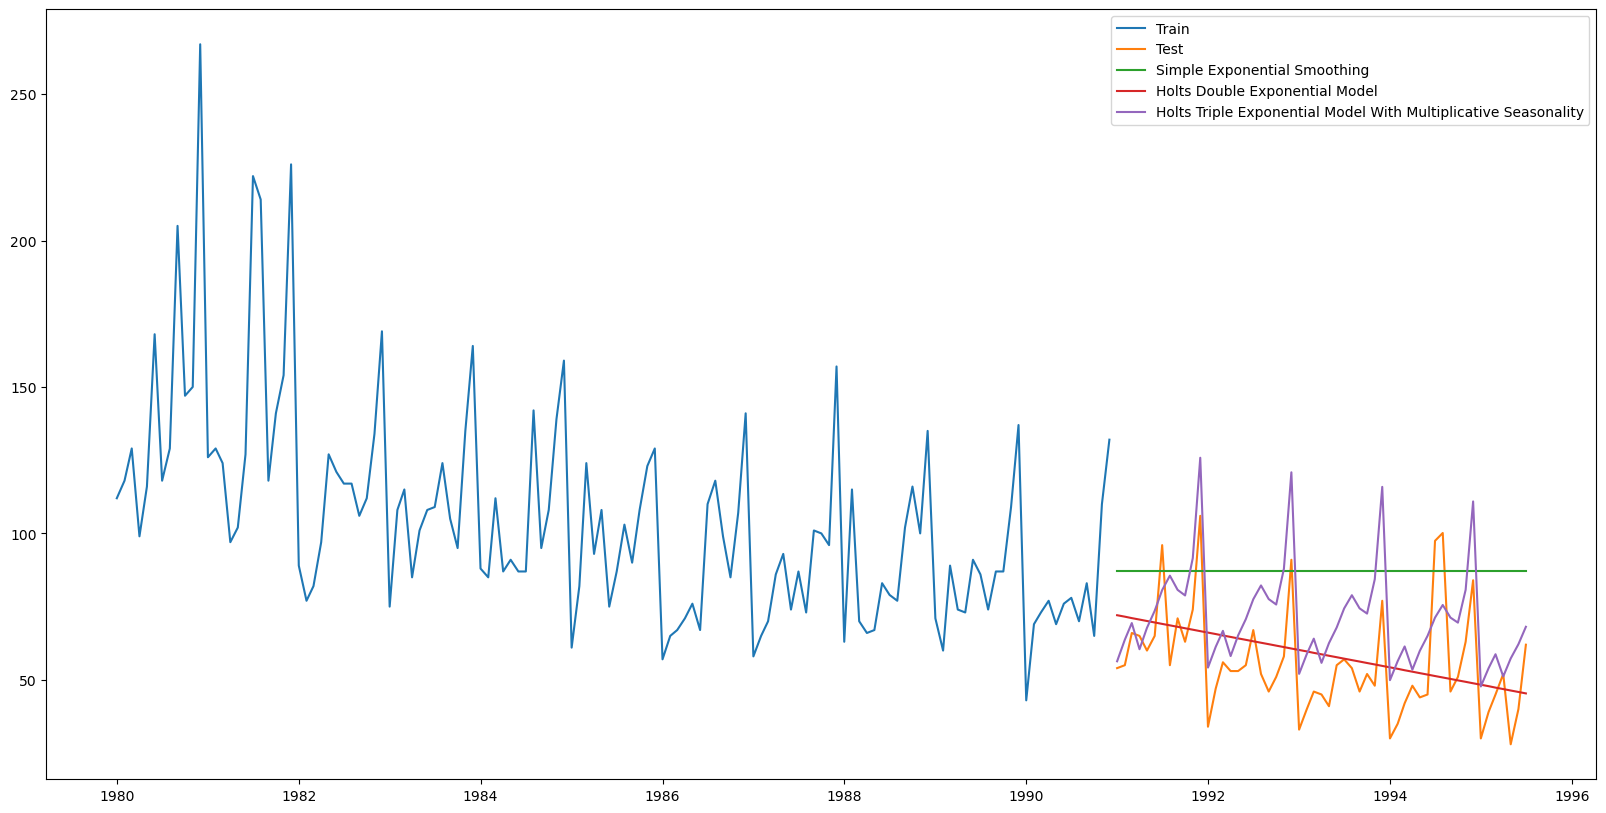

In [ ]:
# Plotting Holt's Triple Exponential Model
plt.figure(figsize = (20, 10))
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(ses_predict, label = 'Simple Exponential Smoothing')
plt.plot(holt_predict, label = 'Holts Double Exponential Model')
plt.plot(tes_predict_mul, label = 'Holts Triple Exponential Model With Multiplicative Seasonality')
plt.legend(loc = 'best')
plt.show()

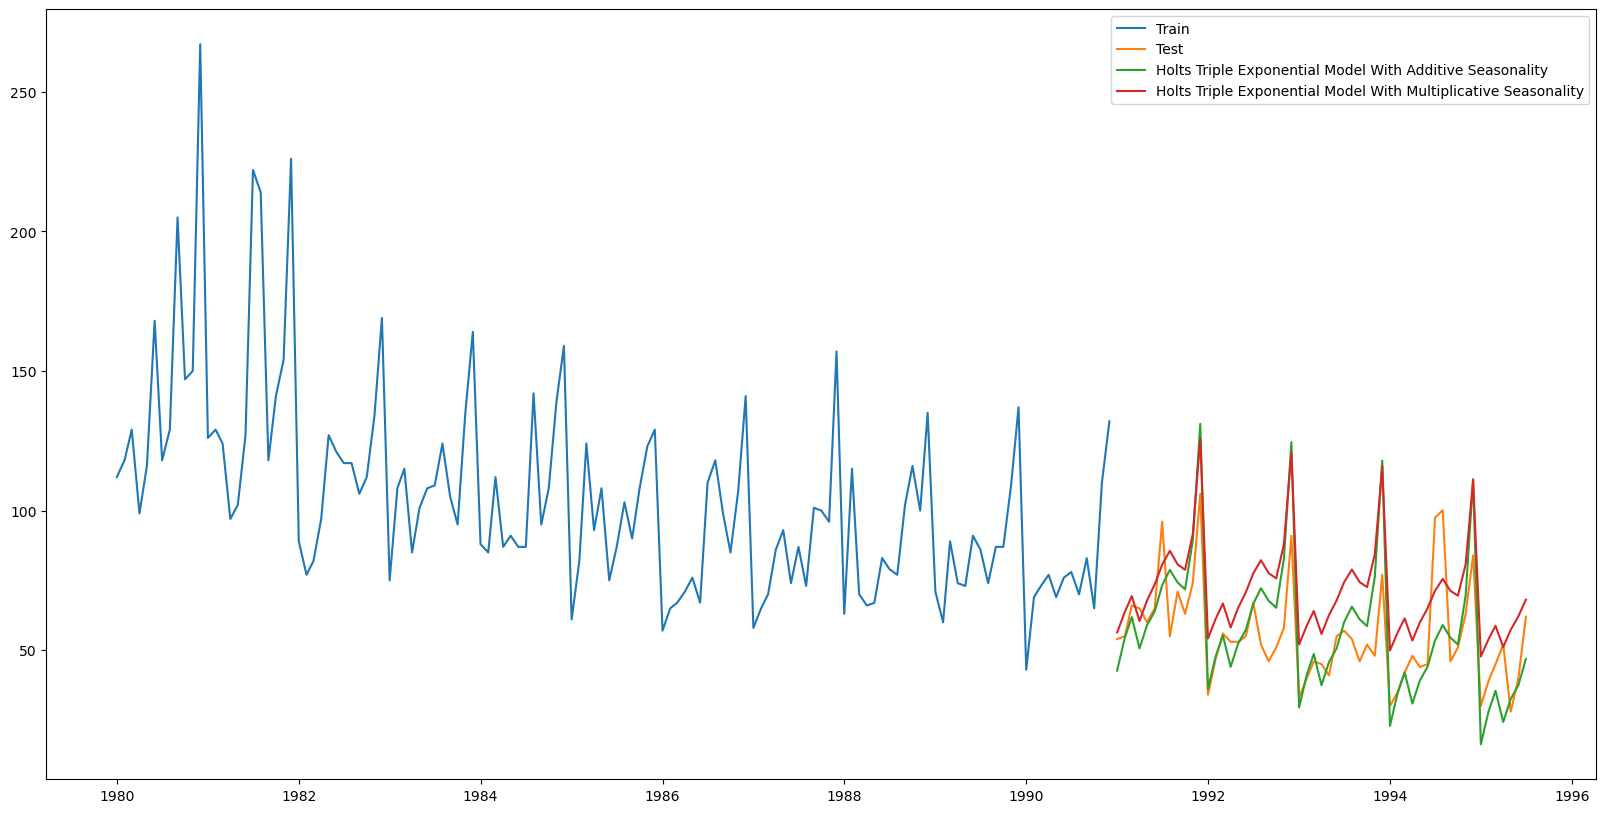

In [ ]:
# Plotting both Triple Exponential smoothing models
plt.figure(figsize = (20, 10))
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(tes_predict_add, label = 'Holts Triple Exponential Model With Additive Seasonality')
plt.plot(tes_predict_mul, label = 'Holts Triple Exponential Model With Multiplicative Seasonality')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# Calculating RMSE
rmse11 = mean_squared_error(test, tes_predict_mul, squared = False)
print('RMSE With HOLTS TRIPLE EXPONENTIAL MODEL With MULTIPLICATIVE SEASONALITY IS: {}'.format(rmse11))

RMSE With HOLTS TRIPLE EXPONENTIAL MODEL With MULTIPLICATIVE SEASONALITY IS: 20.06739992338987


In [ ]:
# Capturing this RMSE into the resultdf dataframe
resultdf7 = pd.DataFrame({'RMSE' : rmse11}, index = ['Holts Triple Exponential Model With Multiplicative Seasonality'])
pd.concat([resultdf1, resultdf2, resultdf3, resultdf4, resultdf5, resultdf6, resultdf7])

,RMSE
Linear Regression On Time,17.748955
Average Forecast,38.975930
Moving Average 2,12.601292
Moving Average 3,15.975795
Moving Average 4,16.435930
Moving Average 5,16.259865
Moving Average 6,16.643213
Simple Exponential Smoothing,36.000828
Holt's Double Exponential Smoothing Model,17.749142
Holts Triple Exponential Model With Additive Seasonality,16.279154


### 1.4 CHECK FOR STATIONARITY

In [ ]:
# We will check for stationarity of the data
adf = adfuller(df1)
print('ADF Statistic: {}'.format(adf[0]))
print('p-value: {}'.format(adf[1]))

ADF Statistic: -19.610595313777
p-value: 0.0


#### From above p value < 0.05. So we reject the null hypothesis. We conclude that the data is stationary.

#### MAKING DATA STATIONARY

In [ ]:
df1s = df1.diff().dropna()
adf = adfuller(df1s)
print('ADF Statistic: {}'.format(adf[0]))
print('p-value: {}'.format(adf[1]))

ADF Statistic: -7.787898956602843
p-value: 8.087140620147566e-12


In [ ]:
# plot the stationary data
plt.figure(figsize = (20, 10))
plt.plot(df1s)
plt.title('Stationary Data',fontsize = 20)
plt.show()

NameError: name 'df1s' is not defined

<Figure size 2000x1000 with 0 Axes>

### 1.5 Model Building With Stationary Data

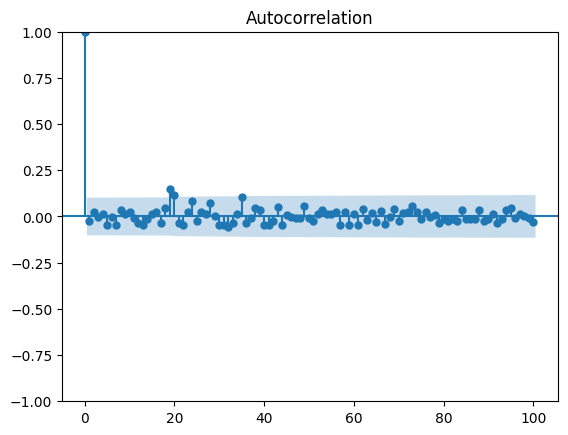

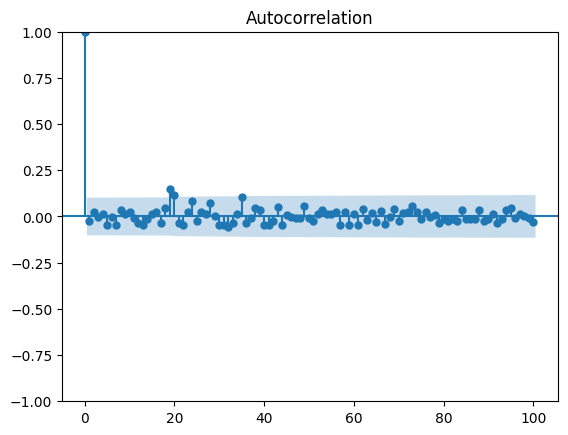

In [ ]:
# Generate ACF and PACF plots
plot_acf(df1,lags = 100)

#### From Above ACF plot, we determine manually that the q value is 2, as 3 is not significant being inside the confidence interval

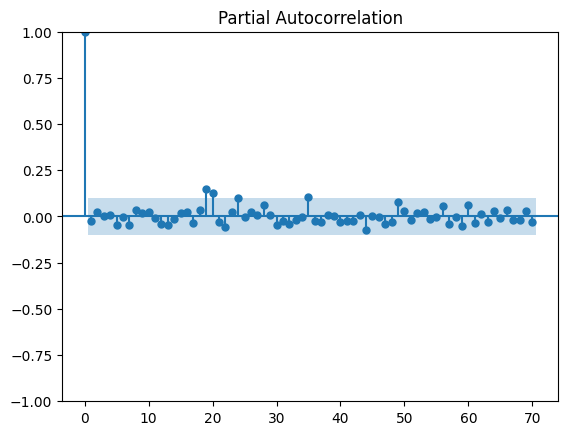

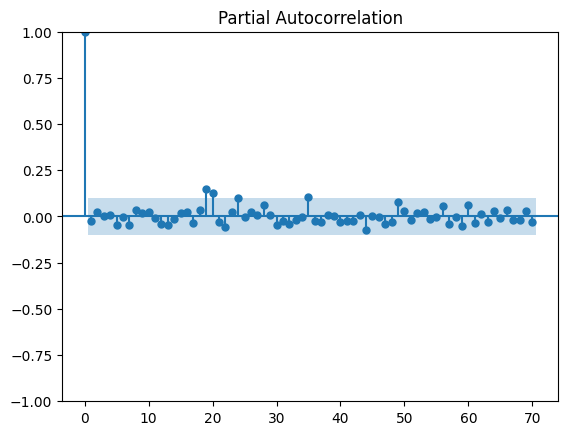

In [ ]:
plot_pacf(df1, lags = 70)

#### From the above PACF plot the p value or the order is 3

#### Model 8 : Manual ARIMA Model With p as 3, d as 1, q as 2
#### d as 1 because we found the df1 time series to have become as stationary after the first differencing.

In [ ]:
# Initializing model
model_arima_manual = SARIMAX(train, order = (3, 1, 2), seasonal_order = None, enforce_stationarity = False, enforce_invertibility = False)

# Fitting model
model_arima_manual = model_arima_manual.fit()

In [ ]:
# Summary
model_arima_manual.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       lcddisplay165846   No. Observations:                  296
Model:               SARIMAX(3, 1, 2)   Log Likelihood                -190.661
Date:                Mon, 30 Dec 2024   AIC                            393.322
Time:                        11:23:22   BIC                            415.383
Sample:                    11-23-2023   HQIC                           402.159
                         - 09-13-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5304      4.456     -0.119      0.905      -9.263       8.203
ar.L2          0.0281      0.110      0.255      0.798      -0.188       0.244
ar.L3        2.04e-06      0.196   1.04e-05      1.000      -0.385       0.385
ma.L1         -0.4669     14.077     -0.033      0.974     -28.057      27.123
ma.L2         -0.5332      6.357     -0.084      0.933     -12.992      11.926
sigma2         0.2126      2.525      0.084      0.933      -4.736       5.161
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            116152.57
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                             8.55
Prob(H) (two-sided):                  0.00   Kurtosis:                        99.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Forecasting on test
manual_arima_predict = model_arima_manual.forecast(steps = len(test))

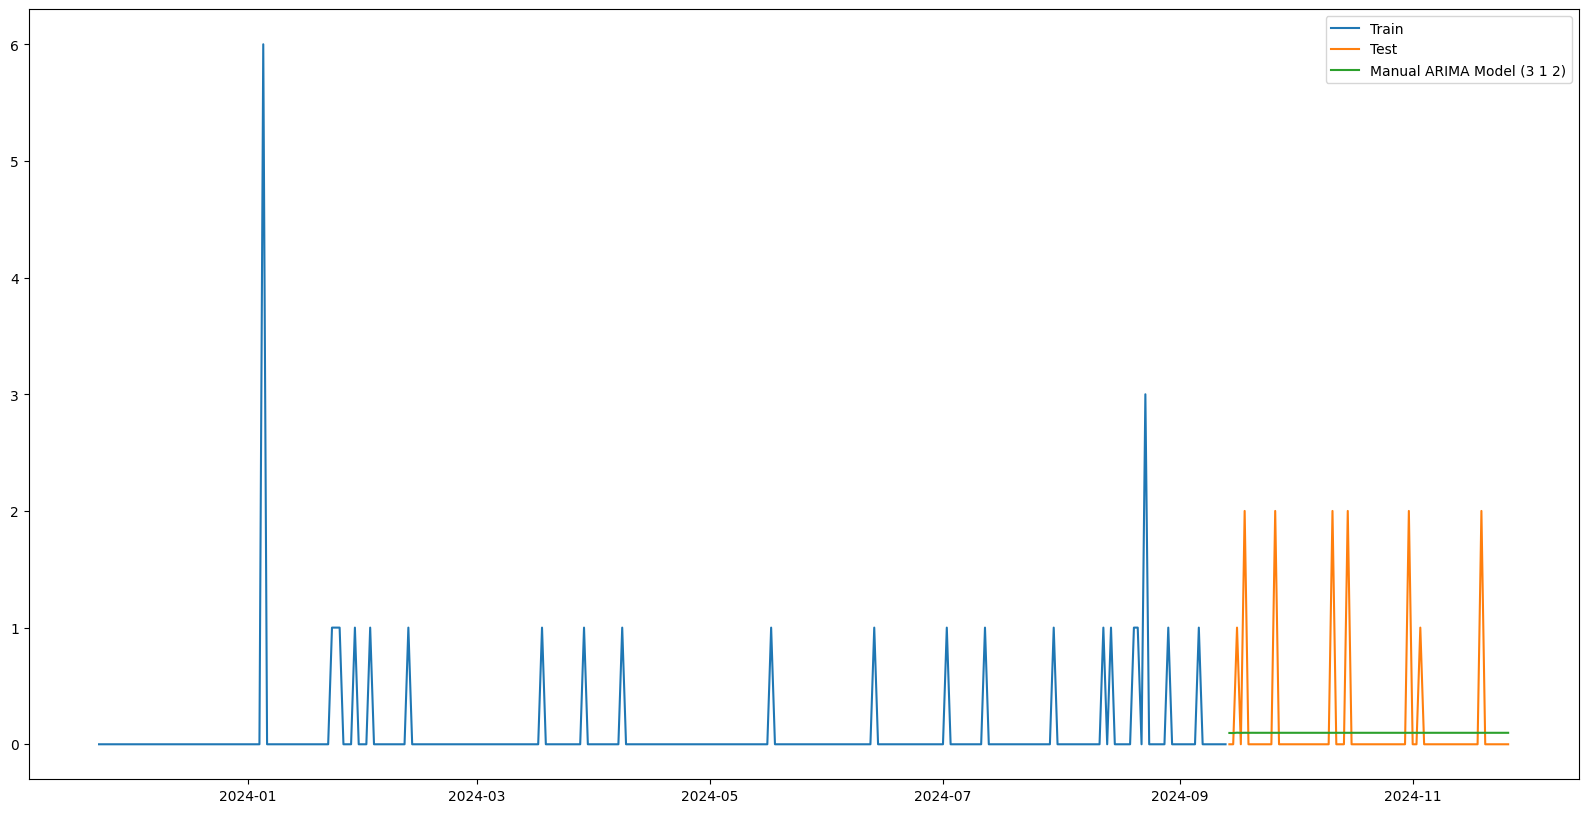

In [ ]:
# Plotting all train, test and forecast
plt.figure(figsize = (20, 10))
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(manual_arima_predict, label = 'Manual ARIMA Model (3 1 2)')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# Calculating RMSE
rmse12 = mean_squared_error(test, manual_arima_predict)
rmse12 = sqrt(rmse12)
print('RMSE With MANUAL ARIMA MODEL (3 1 2) IS: {}'.format(rmse12))

RMSE With MANUAL ARIMA MODEL (3 1 2) IS: 0.5689861285355633


In [ ]:
# Capturing this RMSE into the resultdf dataframe
resultdf8 = pd.DataFrame({'RMSE' : rmse12}, index = ['Manual ARIMA Model (3 1 2)'])
pd.concat([resultdf1, resultdf2, resultdf3, resultdf4, resultdf5, resultdf6, resultdf8])

,RMSE
Linear Regression On Time,0.568927
Average Forecast,0.566466
Moving Average 2,0.419137
Moving Average 3,0.471405
Moving Average 4,0.496610
Moving Average 5,0.502964
Moving Average 6,0.522755
Simple Exponential Smoothing,0.569104
Holt's Double Exponential Smoothing Model,0.565762
Holts Triple Exponential Model With Additive Seasonality,0.569383


#### Model 9: AUTO ARIMA MODEL

In [ ]:
# Setting up p, d and q
d = range(0, 3)
p = range(1, 4)       # taking random values starting from 1 instead of 0
q = range(1, 4)       # taking random values starting from 1 instead of 0

# Generating all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generating all different combinations of seasonal p, q and q triplets for use during SARIMA model
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
# Creating an empty dataframe to capture AIC values
aic = pd.DataFrame(columns = ['param', 'AIC'])

In [ ]:

# Loop through parameter combinations
for param in pdq:
    # Initializing the model
    auto_model_arima = SARIMAX(train, order=param, seasonal_order=None, enforce_stationarity=False, enforce_invertibility=False)

    # Fitting the model
    auto_model_arima = auto_model_arima.fit()

    # Capturing AIC values
    new_row = pd.DataFrame([{'param': param, 'AIC': auto_model_arima.aic}])  # Create a new DataFrame row
    aic = pd.concat([aic, new_row], ignore_index=True)  # Concatenate the new row to the existing DataFrame


In [ ]:
# Viewing AIC values with AIC sorted in ascending order
aic.sort_values('AIC',ascending = True)

,param,AIC
3,"(1, 1, 1)",388.153941
0,"(1, 0, 1)",389.133065
4,"(1, 1, 2)",389.545463
12,"(2, 1, 1)",390.450409
1,"(1, 0, 2)",390.787426
5,"(1, 1, 3)",390.969296
9,"(2, 0, 1)",391.131178
13,"(2, 1, 2)",391.322068
21,"(3, 1, 1)",391.470026
2,"(1, 0, 3)",392.021803


In [ ]:
# Building further ARIMA Model with best parameters obtained from above lowest AIC approach(will take d as 0 because our original data is not stationary)
best_auto_model_arima = SARIMAX(train, order = (1, 1, 1), seasonal_order = None, enforce_stationarity = False, enforce_invertibility = False)

# Fitting model
best_auto_model_arima = best_auto_model_arima.fit()

# Viewing summary
best_auto_model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       lcddisplay165846   No. Observations:                  296
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -191.077
Date:                Mon, 30 Dec 2024   AIC                            388.154
Time:                        11:31:52   BIC                            399.194
Sample:                    11-23-2023   HQIC                           392.576
                         - 09-13-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0024      0.119      0.020      0.984      -0.231       0.236
ma.L1         -1.0000     25.785     -0.039      0.969     -51.538      49.538
sigma2         0.2121      5.470      0.039      0.969     -10.509      10.934
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            117093.77
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                             8.57
Prob(H) (two-sided):                  0.00   Kurtosis:                        99.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Forecasting
best_auto_model_arima_pred = best_auto_model_arima.forecast(len(test),alpha = 0.05)

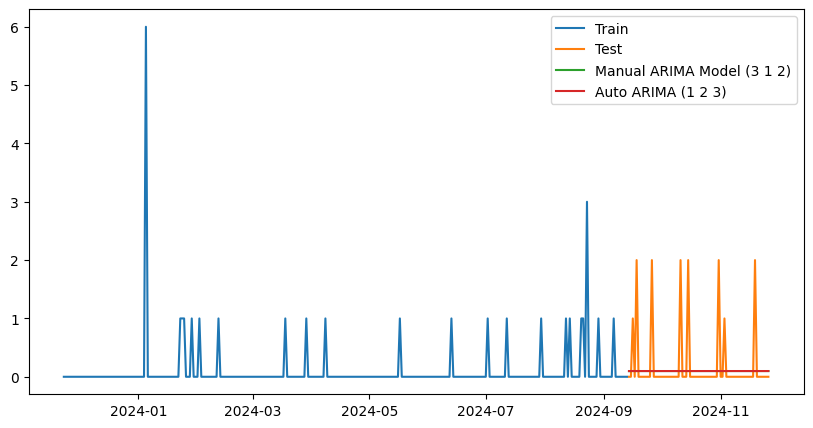

In [ ]:
# Plotting
plt.figure(figsize = (10, 5))
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(manual_arima_predict, label = 'Manual ARIMA Model (3 1 2)')
plt.plot(best_auto_model_arima_pred, label = 'Auto ARIMA (1 2 3)')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# Calculating RMSE
rmse13 = np.sqrt(mean_squared_error(test, best_auto_model_arima_pred))
print("RMSE for best ARIMA model (1, 2, 3) is : ", rmse13)

RMSE for best ARIMA model (1, 2, 3) is :  0.5690501680750785


In [ ]:
# Capturing RMSE values into a dataframe
resultsdf9 = pd.DataFrame({'RMSE' : rmse13}, index = ['Best Auto ARIMA Model (1 2 3)'])
pd.concat([resultdf1, resultdf2, resultdf3, resultdf4, resultdf5, resultdf6, resultdf8, resultsdf9])

,RMSE
Linear Regression On Time,0.568927
Average Forecast,0.566466
Moving Average 2,0.419137
Moving Average 3,0.471405
Moving Average 4,0.496610
Moving Average 5,0.502964
Moving Average 6,0.522755
Simple Exponential Smoothing,0.569104
Holt's Double Exponential Smoothing Model,0.565762
Holts Triple Exponential Model With Additive Seasonality,0.569383


#### MODEL 10: MANUAL SARIMA MODEL

In [ ]:
# we have known earlier from ACF and PACF Plots the order p and q values which are 3 and 2 respectively
# So also we see from the ACF plot that the seasonality frequency is 12 as the pattern is visually seen
# For d we will try 1 first and then with 2

# Initialising manual SARIMA model
manual_sarima_model = SARIMAX(train, order = (1, 1, 1), seasonal_order = (1, 1, 1, 26), enforce_stationarity = False, enforce_invertibility = False)

# Fitting model
manual_sarima_model = manual_sarima_model.fit(max_iter = 10000)

# Viewing summary
print(manual_sarima_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                   lcddisplay165846   No. Observations:                  296
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 26)   Log Likelihood                -155.005
Date:                            Mon, 30 Dec 2024   AIC                            320.009
Time:                                    11:35:24   BIC                            337.433
Sample:                                11-23-2023   HQIC                           327.029
                                     - 09-13-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0446      0.106      0.422      0.673      -0.162       0.252
ma.L1         -1.0151      0.018   

In [ ]:
# Forecasting
manual_sarima_model_pred_d1 = manual_sarima_model.forecast(len(test), alpha = 0.05)

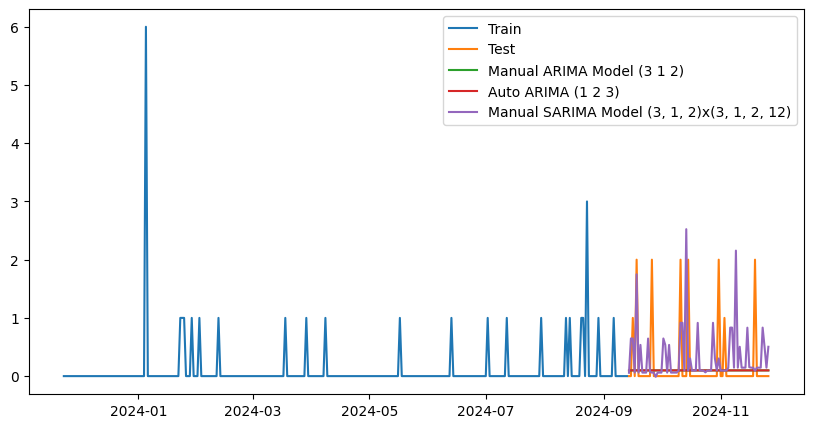

In [ ]:
# Plotting
plt.figure(figsize = (10, 5))
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(manual_arima_predict, label = 'Manual ARIMA Model (3 1 2)')
plt.plot(best_auto_model_arima_pred, label = 'Auto ARIMA (1 2 3)')
plt.plot(manual_sarima_model_pred_d1, label = 'Manual SARIMA Model (3, 1, 2)x(3, 1, 2, 12)')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# Calculating RMSE
rmse14 = np.sqrt(mean_squared_error(test, manual_sarima_model_pred_d1))
print("RMSE for best SARIMA model (3, 1, 2)x(3, 1, 2, 12) is : ", rmse14)

RMSE for best SARIMA model (3, 1, 2)x(3, 1, 2, 12) is :  0.6968611692951362


In [ ]:
# Capturing RMSE values into a dataframe
resultsdf10 = pd.DataFrame({'RMSE' : rmse14}, index = ['Manual SARIMA Model (3, 1, 2)x(3, 1, 2, 12)'])
pd.concat([resultdf1, resultdf2, resultdf3, resultdf4, resultdf5, resultdf6, resultdf8, resultsdf9, resultsdf10])

,RMSE
Linear Regression On Time,0.568927
Average Forecast,0.566466
Moving Average 2,0.419137
Moving Average 3,0.471405
Moving Average 4,0.496610
Moving Average 5,0.502964
Moving Average 6,0.522755
Simple Exponential Smoothing,0.569104
Holt's Double Exponential Smoothing Model,0.565762
Holts Triple Exponential Model With Additive Seasonality,0.569383


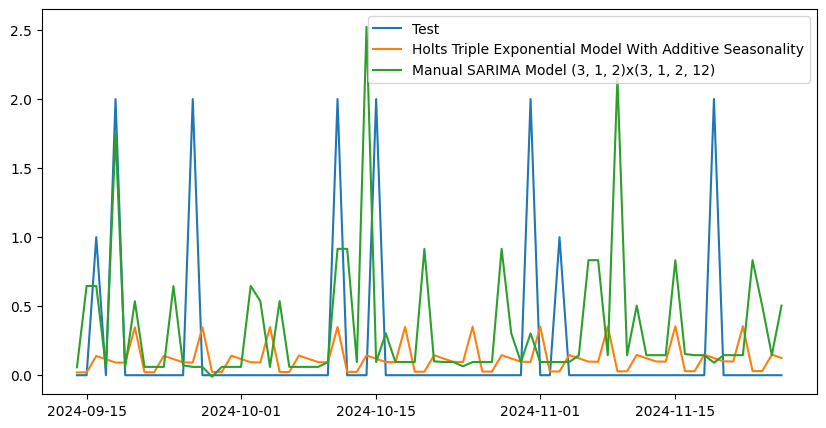

In [ ]:
# Plotting Triple Exponential Smoothing model with additive seasonality and Manual SARIMA model (3 1 2)x(3 1 2 12)
plt.figure(figsize = (10, 5))
plt.plot(test, label = 'Test')
plt.plot(tes_predict_add, label = 'Holts Triple Exponential Model With Additive Seasonality')
plt.plot(manual_sarima_model_pred_d1, label = 'Manual SARIMA Model (3, 1, 2)x(3, 1, 2, 12)')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# now same SARIMA Model but with d = 2

# Initialising manual SARIMA model
manual_sarima_model = SARIMAX(train, order = (1, 1, 1), seasonal_order = (1, 1, 1, 26), enforce_stationarity = False, enforce_invertibility = False)

# Fitting model
manual_sarima_model = manual_sarima_model.fit(max_iter = 10000)

# Viewing summary
print(manual_sarima_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                   lcddisplay165846   No. Observations:                  296
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 26)   Log Likelihood                -155.005
Date:                            Mon, 30 Dec 2024   AIC                            320.009
Time:                                    11:37:09   BIC                            337.433
Sample:                                11-23-2023   HQIC                           327.029
                                     - 09-13-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0446      0.106      0.422      0.673      -0.162       0.252
ma.L1         -1.0151      0.018   

In [ ]:
# Forecasting
manual_sarima_model_pred_d2 = manual_sarima_model.forecast(len(test), alpha = 0.05)

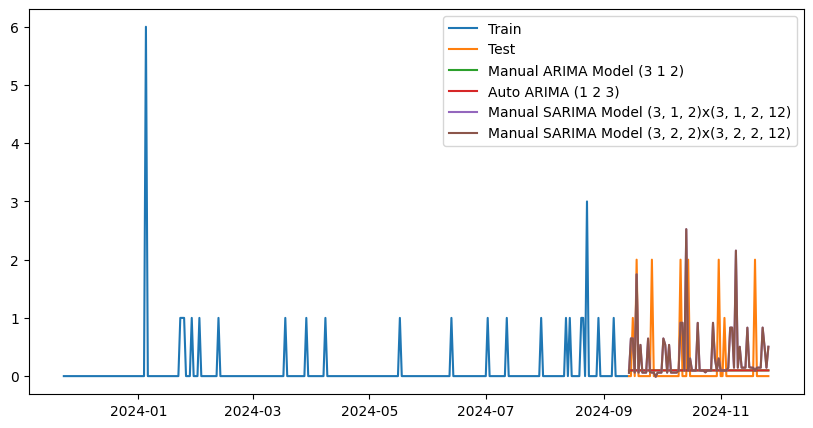

In [ ]:
# Plotting
plt.figure(figsize = (10, 5))
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(manual_arima_predict, label = 'Manual ARIMA Model (3 1 2)')
plt.plot(best_auto_model_arima_pred, label = 'Auto ARIMA (1 2 3)')
plt.plot(manual_sarima_model_pred_d1, label = 'Manual SARIMA Model (3, 1, 2)x(3, 1, 2, 12)')
plt.plot(manual_sarima_model_pred_d2, label = 'Manual SARIMA Model (3, 2, 2)x(3, 2, 2, 12)')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# Calculating RMSE
rmse14d2 = np.sqrt(mean_squared_error(test, manual_sarima_model_pred_d2))
print("RMSE for best SARIMA model (3, 2, 2)x(3, 2, 2, 12) is : ", rmse14d2)

RMSE for best SARIMA model (3, 2, 2)x(3, 2, 2, 12) is :  0.6968611692951362


In [ ]:
# Capturing RMSE values into a dataframe
resultsdf10d2 = pd.DataFrame({'RMSE' : rmse14d2}, index = ['Manual SARIMA Model (3, 2, 2)x(3, 2, 2, 12)'])
pd.concat([resultdf1, resultdf2, resultdf3, resultdf4, resultdf5, resultdf6, resultdf8, resultsdf9, resultsdf10, resultsdf10d2])

,RMSE
Linear Regression On Time,0.568927
Average Forecast,0.566466
Moving Average 2,0.419137
Moving Average 3,0.471405
Moving Average 4,0.496610
Moving Average 5,0.502964
Moving Average 6,0.522755
Simple Exponential Smoothing,0.569104
Holt's Double Exponential Smoothing Model,0.565762
Holts Triple Exponential Model With Additive Seasonality,0.569383


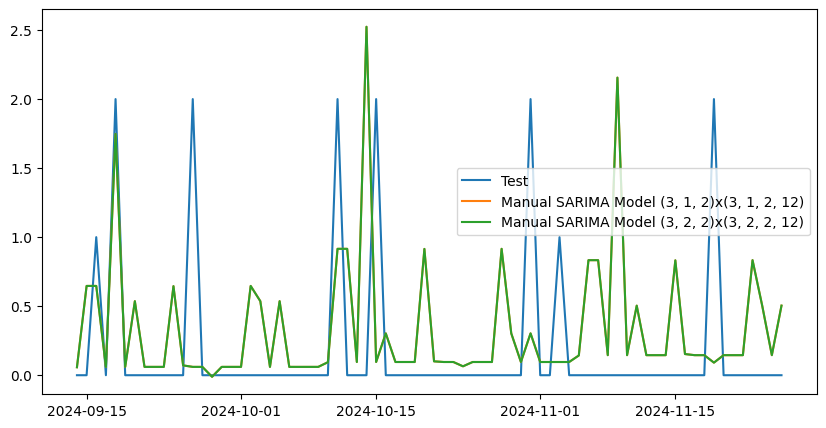

In [ ]:
# Plotting only Triple Exponential Smoothing model with additive seasonality and Manual SARIMA model (3 1 2)x(3 1 2 12) and Manual SARIMA model (3 2 2)x(3 2 2 12)
plt.figure(figsize = (10, 5))
plt.plot(test, label = 'Test')
plt.plot(manual_sarima_model_pred_d1, label = 'Manual SARIMA Model (3, 1, 2)x(3, 1, 2, 12)')
plt.plot(manual_sarima_model_pred_d2, label = 'Manual SARIMA Model (3, 2, 2)x(3, 2, 2, 12)')
plt.legend(loc = 'best')
plt.show()

#### MODEL 11: AUTO SARIMA Model

In [ ]:
best_aic = np.inf
best_pdq= None
best_seasonal_pdq = None
best_model = None

In [ ]:
# Creating an empty dataframe to capture AIC values as we will be running through various models with different parameters
aic = pd.DataFrame(columns = ['param', 'Seasonal', 'AIC'])

In [ ]:
# Setting up p, d, q values
p = range(1,4)
d = range(1,3)
q = range(1,3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:

# Looping through combinations of parameters
for param in pdq:
    for param_seasonal in seasonal_pdq:
        # Initializing the model
        auto_model_sarima = SARIMAX(train,
                                    order=param,
                                    seasonal_order=param_seasonal,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

        # Fitting the model
        auto_model_sarima = auto_model_sarima.fit(max_iter=10000)

        # Capturing AIC values
        new_row = pd.DataFrame([{
            'param': param,
            'Seasonal': param_seasonal,
            'AIC': auto_model_sarima.aic
        }])
        aic = pd.concat([aic, new_row], ignore_index=True)  # Using pd.concat instead of append


In [ ]:
# sort the values
aic.sort_values(by = 'AIC', ascending = True)

,param,Seasonal,AIC
57,"(2, 1, 1)","(3, 1, 2, 12)",234.846361
69,"(2, 1, 2)","(3, 1, 2, 12)",239.524905
21,"(1, 1, 2)","(3, 1, 2, 12)",246.503011
9,"(1, 1, 1)","(3, 1, 2, 12)",246.596154
8,"(1, 1, 1)","(3, 1, 1, 12)",253.938716
...,...,...,...
78,"(2, 2, 1)","(2, 2, 1, 12)",551.987281
122,"(3, 2, 1)","(1, 2, 1, 12)",555.830384
74,"(2, 2, 1)","(1, 2, 1, 12)",562.882407
30,"(1, 2, 1)","(2, 2, 1, 12)",571.703738


In [ ]:
# Building Further SARIMA Model with lowest AIC from above and best parameters which are (3 1 1)x(3 2 1 12)
best_auto_model_sarima = SARIMAX(train, order = (2, 1, 1), seasonal_order = (3, 1, 2, 12), enforce_stationarity = False, enforce_invertibility = False)

# Fitting model
best_auto_model_sarima = best_auto_model_sarima.fit(max_iter = 10000)

# Viewing summary
print(best_auto_model_sarima.summary())

                                        SARIMAX Results                                        
Dep. Variable:                        lcddisplay165846   No. Observations:                  296
Model:             SARIMAX(2, 1, 1)x(3, 1, [1, 2], 12)   Log Likelihood                -108.423
Date:                                 Mon, 30 Dec 2024   AIC                            234.846
Time:                                         11:59:29   BIC                            266.358
Sample:                                     11-23-2023   HQIC                           247.536
                                          - 09-13-2024                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0091      0.087     -0.105      0.916      -0.180       0

In [ ]:
# Forecasting
best_auto_model_sarima_pred = best_auto_model_sarima.forecast(len(test), alpha = 0.05);

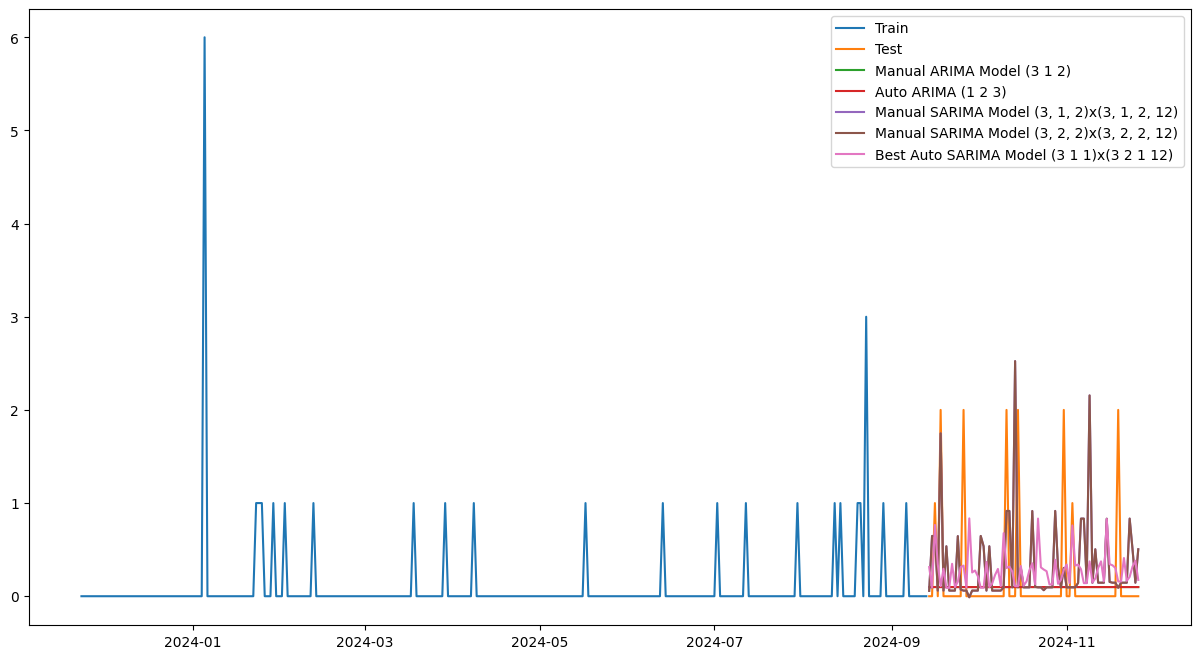

In [ ]:
# Plotting
plt.figure(figsize = (15, 8))
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(manual_arima_predict, label = 'Manual ARIMA Model (3 1 2)')
plt.plot(best_auto_model_arima_pred, label = 'Auto ARIMA (1 2 3)')
plt.plot(manual_sarima_model_pred_d1, label = 'Manual SARIMA Model (3, 1, 2)x(3, 1, 2, 12)')
plt.plot(manual_sarima_model_pred_d2, label = 'Manual SARIMA Model (3, 2, 2)x(3, 2, 2, 12)')
plt.plot(best_auto_model_sarima_pred, label = 'Best Auto SARIMA Model (3 1 1)x(3 2 1 12)')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# Calculating RMSE
rmse15 = np.sqrt(mean_squared_error(test, best_auto_model_sarima_pred))
print("RMSE for best SARIMA model (3, 1, 1)x(3, 2, 1, 12) is : ", rmse15)

RMSE for best SARIMA model (3, 1, 1)x(3, 2, 1, 12) is :  0.5900222933730628


In [ ]:
# Capturing RMSE values into a dataframe
resultsdf11 = pd.DataFrame({'RMSE' : rmse15}, index = ['Best Auto SARIMA Model (3 1 1)x(3 2 1 12)'])
pd.concat([resultdf1, resultdf2, resultdf3, resultdf4, resultdf5, resultdf6, resultdf8, resultsdf9, resultsdf10, resultsdf10d2, resultsdf11])

,RMSE
Linear Regression On Time,0.568927
Average Forecast,0.566466
Moving Average 2,0.419137
Moving Average 3,0.471405
Moving Average 4,0.496610
Moving Average 5,0.502964
Moving Average 6,0.522755
Simple Exponential Smoothing,0.569104
Holt's Double Exponential Smoothing Model,0.565762
Holts Triple Exponential Model With Additive Seasonality,0.569383


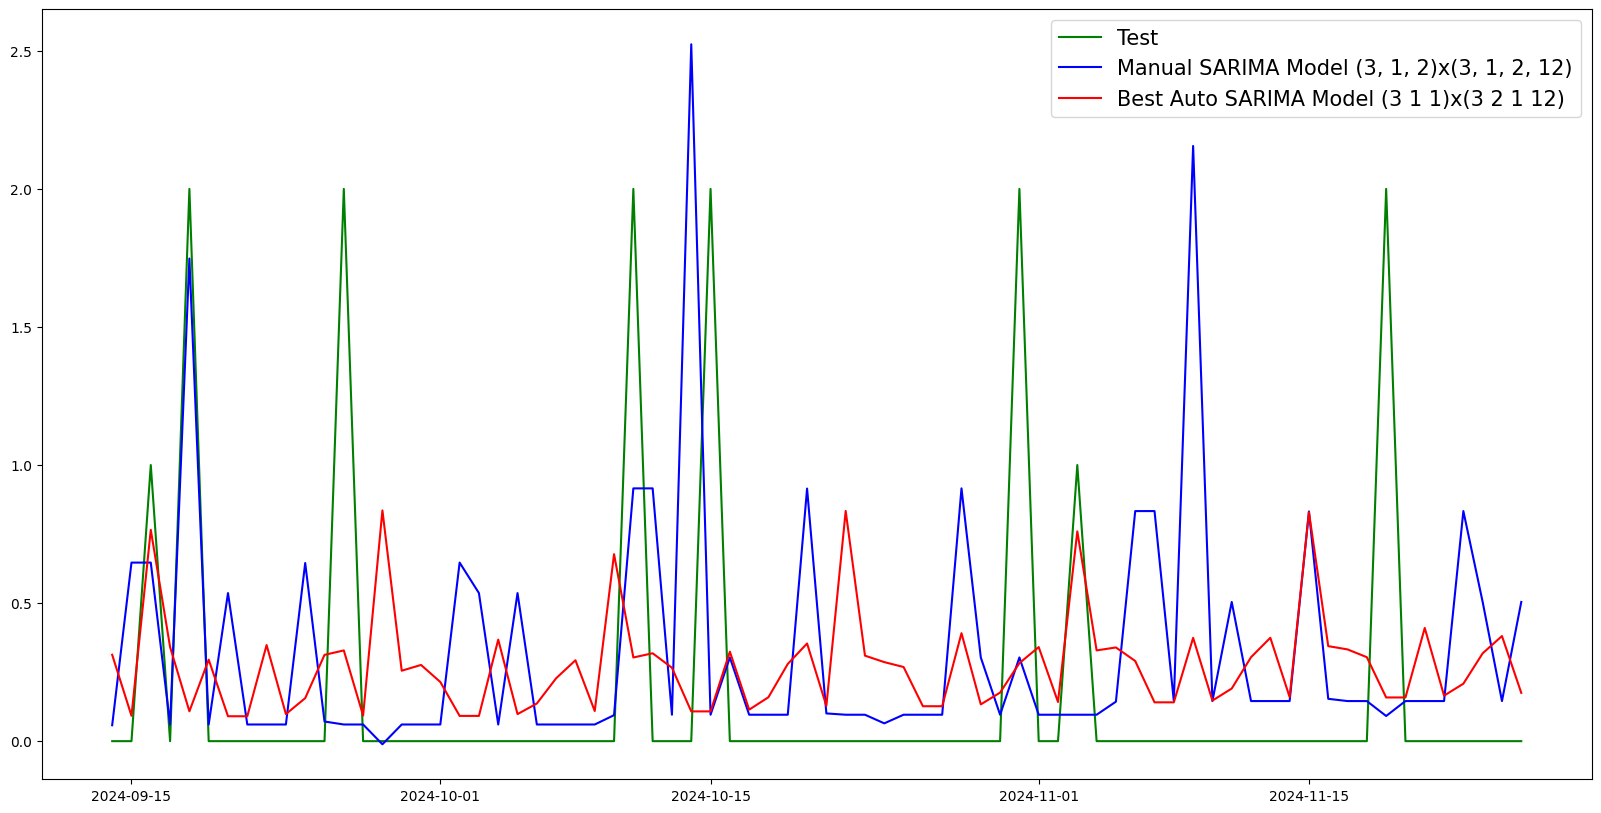

In [ ]:
# Plotting Train, Test and Best Auto SARIMA Model and Manual SARIMA Model
plt.figure(figsize = (20, 10))
plt.plot(test, color = 'green', label = 'Test')
plt.plot(manual_sarima_model_pred_d1, color = 'blue', label = 'Manual SARIMA Model (3, 1, 2)x(3, 1, 2, 12)')
plt.plot(best_auto_model_sarima_pred, color = 'red', label = 'Best Auto SARIMA Model (3 1 1)x(3 2 1 12)')
plt.legend(loc = 'best', fontsize = 15)
plt.show()

#### Now Comparing All MOdels and Choosing the Best Model

In [ ]:
resultdf = pd.concat([resultdf1, resultdf2, resultdf3, resultdf4, resultdf5, resultdf6, resultdf8, resultsdf9, resultsdf10, resultsdf10d2, resultsdf11])

In [ ]:
resultdf.sort_values(by = 'RMSE', ascending = True)

,RMSE
Moving Average 2,0.419137
Moving Average 3,0.471405
Moving Average 4,0.496610
Moving Average 5,0.502964
Moving Average 6,0.522755
Holt's Double Exponential Smoothing Model,0.565762
Average Forecast,0.566466
Linear Regression On Time,0.568927
Manual ARIMA Model (3 1 2),0.568986
Best Auto ARIMA Model (1 2 3),0.569050


#### We can conclude that the best model is Moving Average 2. However we cannot use this model for forecasting because we need to predict the next 12 months ahead of the data which is not possible with this model as it calculates moving average from the available data points whereas for forecasting for future points, we do not have any data points available currently with us.

#### So we use the next model with least RMSE which is Holt's Triple Exponential Model With Additive Seasonality model having a difference of just 4 in RMSE from the best model.

In [ ]:
# Initialising Holt Winters Triple Exponential Model on complete data with additive seasonality
# best_model_tes = ExponentialSmoothing(df1, trend = 'add', seasonal = 'additive', seasonal_periods = 12).fit()
best_model_des = Holt(train, initialization_method = 'estimated').fit(optimized = True)

In [ ]:
# Forecasting For next 12 months ahead of the data
best_model_des_pred = best_model_des.forecast(steps = 12);

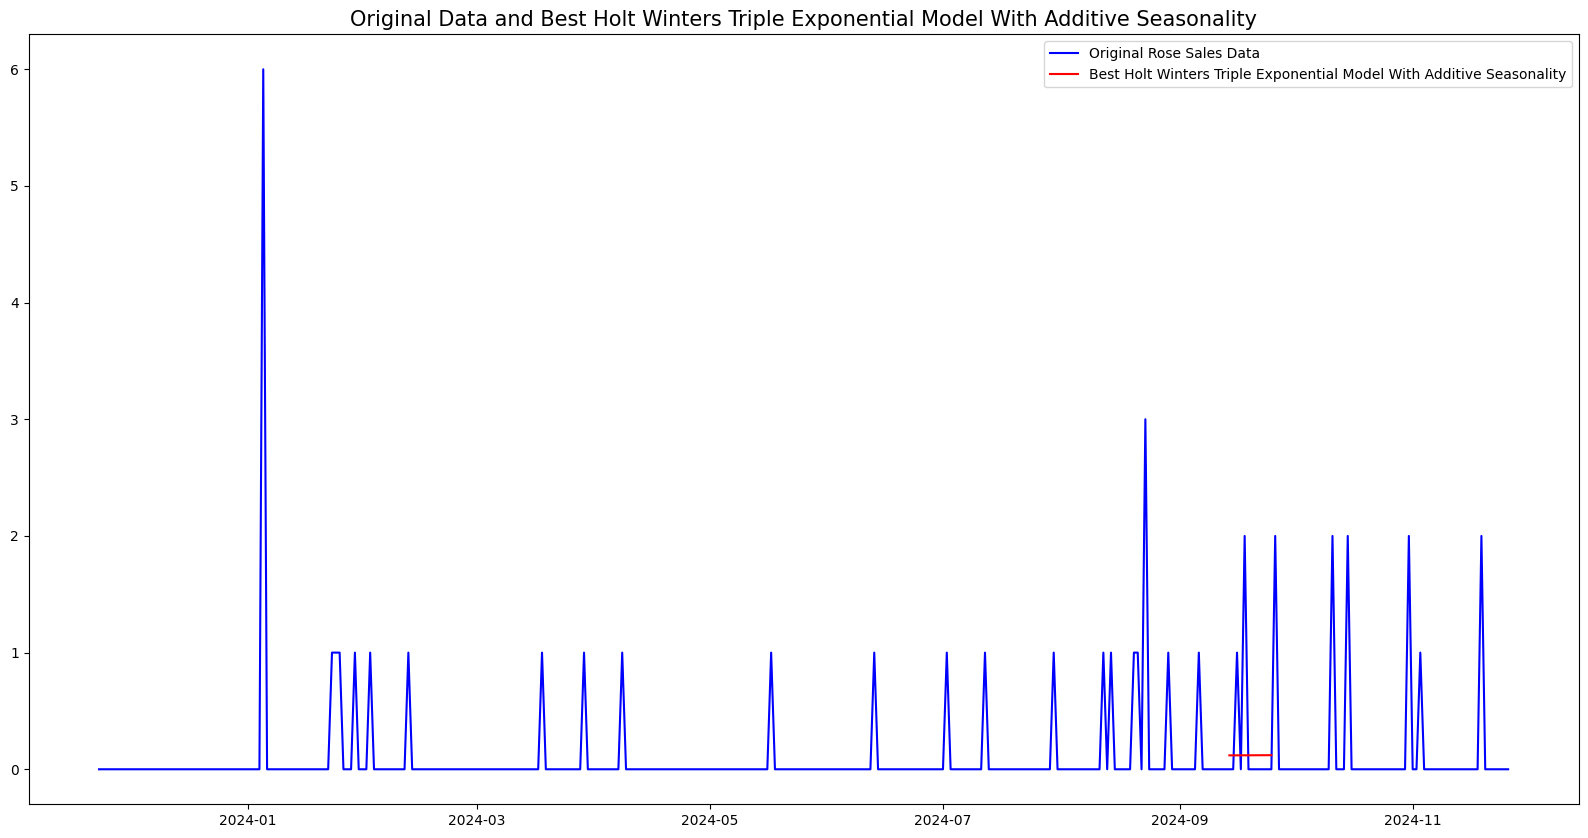

In [ ]:
# Plotting
plt.figure(figsize = (20, 10))
plt.plot(df1, color = 'blue', label = 'Original Rose Sales Data')
plt.plot(best_model_des_pred, color = 'red', label = 'Best Holt Winters Triple Exponential Model With Additive Seasonality')
plt.legend(loc = 'best')
plt.title('Original Data and Best Holt Winters Triple Exponential Model With Additive Seasonality',fontsize = 15)
plt.show()

In [ ]:
# Get the best parameters
print(best_model_des.model.params)

{'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 1.4901161193847656e-08, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 0.07671062653470088, 'initial_trend': 0.0001431801372920869, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [ ]:
# see the forecast values
best_model_des_pred

,0
2024-09-14,0.119235
2024-09-15,0.119378
2024-09-16,0.119521
2024-09-17,0.119665
2024-09-18,0.119808
2024-09-19,0.119951
2024-09-20,0.120094
2024-09-21,0.120237
2024-09-22,0.120381
2024-09-23,0.120524


In [ ]:
# save the predicted values
best_model_des_pred.to_csv('best_model_pred.csv')

### CONCLUSION

####  Holt's Triple Exponential Model With Additive Seasonality model having a RMSE of 16.279154 is the best model which is used to forecast the ROSE wine sales data ahead of time.